## VALIDATE THE SYNTHETIC POPULATION DISTRIBUTION

This Script provides the relevant visualizations for the validation and comparison activities. In particular, the visualizations are: 
- Visualization for the validation of synthetic vs real population on each demographic component (household, age, hypertension, diabetes)
- Visualization for the comparison of the original distributions across countries on each demographic component (household, age, hypertension, diabetes)  

Definition of a function *validate_population(country,n)* which returns the plots for a given country (*country*) and a population size (*n*) to compare the prevalences results of the synthetic population - the sampled ones - to the original prevalences levels. The validation is performed for each of the demographic element sampled: households, age, hypertension, and diabetes. 

The aim of this script and function is to compare the similarity between the original and sample results in order to ensure that all the subsequent analysis is made based on meaningful data.   
It does not generate new population but rather analyses an already simulated one. 

In addition to the validation between the synthetic and original distributions, this Script also provides a comparison between the original distributions across the different countries. This is aimed at detecting demographic and structural discrepancies that exist in the real populations. As usual, the comparison for the original distributions is made on each of the demographic factors: households, age, hypertension and diabetes. 

### TABLE OF CONTENTS     
[1. Validation Functions](#validation_fn)       
[2. Validation Plots](#validation_ex)     
[2.1 Italy Plots](#ita)    
[2.2 Spain Plots](#spa)    
[2.3 Germany Plots](#ger)    
[2.4 France Plots](#fra)   
[3. Compare Countries](#compare)  
[3.1 Compare Household Distributions](#compare_house)  
[3.2 Compare Age Distributions](#compare_age)    
[3.3 Compare Hypertension Distributions](#compare_hyp)  
[3.4 Compare Diabetes Distributions](#compare_diab)   

In [1]:
import pandas as pd
import numpy as np
import ipynb
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from matplotlib import gridspec
from matplotlib import colors
from numba import jit
from numba.typed import List
import matplotlib as mpl
import pickle
import os
import json
from ipynb.fs.full.Sample_Households import *  # import the Sample Comorbidities script and functions
from ipynb.fs.full.Sample_Comorbidities import * # import the Sample Households script and functions
#from ipynb.fs.full.Sample_Population import *

b_dir = './'  # set base directory where are saved input Files and Scripts 
target_dir = "./Plots/Validation_Plots/" # set target directory where save output

### 1.  Validation Functions 
<a id="validation_fn"></a>

In [2]:
### FUNCTION TO PLOT VALIDATION RESULTS ###
def validate_population(country,n, save_plot=True):
    # READ THE GENERATED PICKLE File for the country of interest and the synthetic population size
    age, households, households_tot, diabetes, hypertension, age_groups = pd.read_pickle(os.path.join(b_dir,'{0}_population_{1}.pickle'.format(country,n)))

    #### ORIGINAL POPULATION DATA 
    # Validate AGE DISTRIBUTION 
    age_distribution = get_age_distribution(country) 
    age_distribution = np.array(age_distribution) 
    age_distribution = age_distribution/age_distribution.sum()

    # Validate HOUSEHOLDS PROB and COMORBIDITIES PROBS
    ###### ITALY ######
    if country == 'Italy':
        household_types = ['Single Household','Couple \n without Children','Single parent \n + 1 Child','Single parent \n  + 2 Children','Single parent \n + 3 Children',
                   'Couple \n+ 1 Child','Couple \n + 2 Children','Couple \n + 3 Children','Family without \n a Nucleus','Nucleus \n with \n Other Persons','Household with \n 2 or \n more nuclei']
        
        household_probs = np.array([0.309179, 0.196000, 0.0694283, 0.0273065, 0.00450268, 0.152655, 0.132429, 0.0200969, 
                               0.049821, 0.033, 0.017])
        household_probs /= household_probs.sum()

        prevalence_diabetes = np.zeros(101)
        prevalence_hypertension = np.zeros(101)
        col = 'g'

        for i in range(101):
            if i <= 4:
                prevalence_diabetes[i] = 0.00064
            elif i <= 9:
                prevalence_diabetes[i] = 0.0022
            elif i <= 14:
                prevalence_diabetes[i] = 0.0038
            elif i <= 19:
                prevalence_diabetes[i] = 0.0058
            elif i <= 24:
                prevalence_diabetes[i] = 0.0107
            elif i <= 29:
                prevalence_diabetes[i] = 0.0180
            elif i <= 34:
                prevalence_diabetes[i] = 0.0261
            elif i <= 39:
                prevalence_diabetes[i] = 0.0360
            elif i <= 44:
                prevalence_diabetes[i] = 0.0496
            elif i <= 49:
                prevalence_diabetes[i] = 0.0729
            elif i <= 54:
                prevalence_diabetes[i] = 0.1080
            elif i <= 59:
                prevalence_diabetes[i] = 0.1575
            elif i <= 64:
                prevalence_diabetes[i] = 0.2153
            elif i <= 69:
                prevalence_diabetes[i] = 0.2634
            elif i <= 74:
                prevalence_diabetes[i] = 0.2969
            elif i <= 79:
                prevalence_diabetes[i] = 0.3086
            elif i <= 84:
                prevalence_diabetes[i] = 0.3031
            elif i <= 89:
                prevalence_diabetes[i] = 0.2877
            else:
                prevalence_diabetes[i] = 0.2615

        for i in range(101):
            if i<35:
                prevalence_hypertension[i]= 0.14*(i/35.)
            elif i<39:
                prevalence_hypertension[i]=0.14
            elif i<44:
                prevalence_hypertension[i]=0.1
            elif i<49:
                prevalence_hypertension[i]=0.16
            elif i<54:
                prevalence_hypertension[i]=0.3
            else:
                prevalence_hypertension[i]=0.34+0.00025*i

    ###### SPAIN ######    
    elif country == 'Spain':
        household_types = ['Single Household','Couple \n without Children','Single parent \n Child/Children','Couple \n+ 1 Child',
                           'Couple \n + 2 Children','Couple \n + 3 Children','Family without \n a Nucleus','Nucleus \n with \n Other Persons',
                           'Household with \n 2 or \n more nuclei']
        
        household_probs = np.array([0.257, 0.211 , 0.101, 0.157, 0.148, 0.030, 0.030, 0.043, 0.023])
        household_probs /= household_probs.sum()

        prevalence_diabetes = np.zeros(101)
        prevalence_hypertension = np.zeros(101)
        col = 'r'

        for i in range(101):
            if i <= 4:
                prevalence_diabetes[i] = 0.00085
            elif i <= 9:
                prevalence_diabetes[i] = 0.0023
            elif i <= 14:
                prevalence_diabetes[i] = 0.0040
            elif i <= 19:
                prevalence_diabetes[i] = 0.0060
            elif i <= 24:
                prevalence_diabetes[i] = 0.0141
            elif i <= 29:
                prevalence_diabetes[i] = 0.0231
            elif i <= 34:
                prevalence_diabetes[i] = 0.0312
            elif i <= 39:
                prevalence_diabetes[i] = 0.0408
            elif i <= 44:
                prevalence_diabetes[i] = 0.0540
            elif i <= 49:
                prevalence_diabetes[i] = 0.0765
            elif i <= 54:
                prevalence_diabetes[i] = 0.1094
            elif i <= 59:
                prevalence_diabetes[i] = 0.1556
            elif i <= 64:
                prevalence_diabetes[i] = 0.2101
            elif i <= 69:
                prevalence_diabetes[i] = 0.2601
            elif i <= 74:
                prevalence_diabetes[i] = 0.2996
            elif i <= 79:
                prevalence_diabetes[i] = 0.3168
            elif i <= 84:
                prevalence_diabetes[i] = 0.3124
            elif i <= 89:
                prevalence_diabetes[i] = 0.2981
            else:
                prevalence_diabetes[i] = 0.2752   

        for i in range(101):
            if i<18:
                prevalence_hypertension[i]=9.3*(i/18.)
            elif i<30:
                prevalence_hypertension[i]=9.3
            elif i<45:
                prevalence_hypertension[i]=17.2
            elif i<60:
                prevalence_hypertension[i]=44.4
            elif i<75:
                prevalence_hypertension[i]=75.4
            else:
                prevalence_hypertension[i]=88.7
        prevalence_hypertension = [p/100 for p in prevalence_hypertension]

    ###### GERMANY ###### 
    elif country == 'Germany':
        household_types = ['Single Household','Couple \n without Children','Single parent \n + 1 Child','Single parent \n  + 2 Children','Single parent \n + 3 Children',
                           'Couple \n+ 1 Child','Couple \n + 2 Children','Couple \n + 3 Children','Other \n Household \n No Children','Other \n Household \n + 1 Child',
                           'Other \n Household \n + 2 Children','Other \n Household \n + 3 Children']
        
        household_probs = np.array([0.4184, 0.2828, 0.0226, 0.0103, 0.0028, 0.0684, 0.0665, 0.0222, 0.0780, 0.0192, 0.0061, 0.0021])
        household_probs /= household_probs.sum()

        prevalence_diabetes = np.zeros(101)
        prevalence_hypertension = np.zeros(101)
        col = 'b'

        for i in range(101):
            if i <= 4:
                prevalence_diabetes[i] = 0.00059
            elif i <= 9:
                prevalence_diabetes[i] = 0.0021
            elif i <= 14:
                prevalence_diabetes[i] = 0.0036
            elif i <= 19:
                prevalence_diabetes[i] = 0.0072
            elif i <= 24:
                prevalence_diabetes[i] = 0.0163
            elif i <= 29:
                prevalence_diabetes[i] = 0.0266
            elif i <= 34:
                prevalence_diabetes[i] = 0.0367
            elif i <= 39:
                prevalence_diabetes[i] = 0.0490
            elif i <= 44:
                prevalence_diabetes[i] = 0.0658
            elif i <= 49:
                prevalence_diabetes[i] = 0.0929
            elif i <= 54:
                prevalence_diabetes[i] = 0.1315
            elif i <= 59:
                prevalence_diabetes[i] = 0.1823
            elif i <= 64:
                prevalence_diabetes[i] = 0.2409
            elif i <= 69:
                prevalence_diabetes[i] = 0.2956
            elif i <= 74:
                prevalence_diabetes[i] = 0.3406
            elif i <= 79:
                prevalence_diabetes[i] = 0.3615
            elif i <= 84:
                prevalence_diabetes[i] = 0.3595
            elif i <= 89:
                prevalence_diabetes[i] = 0.3458
            else:
                prevalence_diabetes[i] = 0.3230

        for i in range(101):
            if i<18:
                prevalence_hypertension[i]=5*(i/18.)
            elif i<29:
                prevalence_hypertension[i]=5
            elif i<44:
                prevalence_hypertension[i]=11.7
            elif i<64:
                prevalence_hypertension[i]=38
            elif i<74:
                prevalence_hypertension[i]=71
            elif i<84:
                prevalence_hypertension[i]=79.9
            else:
                prevalence_hypertension[i]=73.6
        prevalence_hypertension = [p/100 for p in prevalence_hypertension]

    ###### FRANCE ###### 
    elif country == 'France':
        household_types = ['Single Household','Couple \n without Children','Single parent \n + 1 Child','Single parent \n  + 2 Children','Single parent \n + 3 Children',
                           'Couple \n+ 1 Child','Couple \n + 2 Children','Couple \n + 3 Children','Other \n Household \n No Children','Other \n Household \n + 1 Child',
                           'Other \n Household \n + 2 Children','Other \n Household \n + 3 Children']
        
        household_probs = np.array([0.3622,0.2616, 0.0309, 0.0218, 0.0086, 0.0707,0.0909, 0.0410, 0.0768, 0.0217, 0.0086,0.0046])
        household_probs /= household_probs.sum()

        prevalence_diabetes = np.zeros(101)
        prevalence_hypertension = np.zeros(101)
        col = 'y'

        for i in range(101):
            if i <= 4:
                prevalence_diabetes[i] = 0.00059
            elif i <= 9:
                prevalence_diabetes[i] = 0.0020
            elif i <= 14:
                prevalence_diabetes[i] = 0.0036
            elif i <= 19:
                prevalence_diabetes[i] = 0.0047
            elif i <= 24:
                prevalence_diabetes[i] = 0.0074
            elif i <= 29:
                prevalence_diabetes[i] = 0.0118
            elif i <= 34:
                prevalence_diabetes[i] = 0.0161
            elif i <= 39:
                prevalence_diabetes[i] = 0.0212
            elif i <= 44:
                prevalence_diabetes[i] = 0.0280
            elif i <= 49:
                prevalence_diabetes[i] = 0.0387
            elif i <= 54:
                prevalence_diabetes[i] = 0.0537
            elif i <= 59:
                prevalence_diabetes[i] = 0.0738
            elif i <= 64:
                prevalence_diabetes[i] = 0.0978
            elif i <= 69:
                prevalence_diabetes[i] = 0.1221
            elif i <= 74:
                prevalence_diabetes[i] = 0.1436
            elif i <= 79:
                prevalence_diabetes[i] = 0.1536
            elif i <= 84:
                prevalence_diabetes[i] = 0.1518
            elif i <= 89:
                prevalence_diabetes[i] = 0.1429
            else:
                prevalence_diabetes[i] = 0.1268

        for i in range(101):
            if i<18:
                prevalence_hypertension[i]=8*(i/18.)
            elif i<34:
                prevalence_hypertension[i]=8
            elif i<49:
                prevalence_hypertension[i]=28
            elif i<64:
                prevalence_hypertension[i]=57
            elif i<79:
                prevalence_hypertension[i]=76
            else:
                prevalence_hypertension[i]=79
        prevalence_hypertension = [p/100 for p in prevalence_hypertension]
        
    # Get SAMPLED HOUSEHOLD TYPE DISTRIBUTION
    households_tot = households_tot/households_tot.sum()
    
    # Get SAMPLED DIABETE DISTRIBUTION
    diab_age = [] 
    for a in age_groups: 
        c = 0
        for i in a:
            if diabetes[i] == True:
                c +=1
        diab_age.append(c)

    sample_age = [] 
    for a in age_groups: 
        sample_age.append(len(a))
    prevalence_diab_sample = [diab/tot for diab,tot in zip(diab_age,sample_age)]
    
    #Get SAMPLED HYPERTENSION DISTRIBUTION
    hyp_age = [] 
    for a in age_groups: 
        c = 0
        for i in a:
            if hypertension[i] == True:
                c +=1
        hyp_age.append(c)

    sample_age = [] 
    for a in age_groups: 
        sample_age.append(len(a))
    prevalence_hyp_sample = [hyp/tot for hyp,tot in zip(hyp_age,sample_age)] 
    
    # Get SAMPLED AGE DISTRIBUTION  
    age_distr_sampled = []
    for a in age_groups:
        age_distr_sampled.append(len(a))
    age_distr_sampled = np.array(age_distr_sampled)
    age_distr_sampled = age_distr_sampled/age_distr_sampled.sum()
    
    # Get SAMPLED DISTRIBUTIONS BY AGE GROUPS (10-Y INTERVAL)
    prevalence_hyp_sample = np.array(prevalence_hyp_sample)
    prevalence_hypertension = np.array(prevalence_hypertension)
    prevalence_diab_sample = np.array(prevalence_diab_sample)
    prevalence_diabetes = np.array(prevalence_diabetes)
    
    age_distr_groups = np.zeros(11) # initialize the empty arrays to store the original age-distr by age interval
    age_distr_groups_sampled = np.zeros(11) # initialize the empty arrays to store the sampled age-distr by age interval
    hyp_distr_groups = np.zeros(11) 
    hyp_distr_groups_sampled = np.zeros(11)
    diab_distr_groups = np.zeros(11) 
    diab_distr_groups_sampled = np.zeros(11) 
    
    for i in range(11):
        if i == 10: 
            age_distr_groups[i] = round(age_distribution[i*10:].mean(),9)
            age_distr_groups_sampled[i] = round(age_distr_sampled[i*10:].mean(),9)
            hyp_distr_groups[i] = round(prevalence_hypertension[i*10:].mean(),9)
            hyp_distr_groups_sampled[i] = round(prevalence_hyp_sample[i*10:].mean(),9)
            diab_distr_groups[i] = round(prevalence_diabetes[i*10:].mean(),9)
            diab_distr_groups_sampled[i] = round(prevalence_diab_sample[i*10:].mean(),9)
        else: 
            age_distr_groups[i] = round(age_distribution[i*10:i*10+10].mean(),9)
            age_distr_groups_sampled[i] = round(age_distr_sampled[i*10:i*10+10].mean(),9)
            hyp_distr_groups[i] = round(prevalence_hypertension[i*10:i*10+10].mean(),9)
            hyp_distr_groups_sampled[i] = round(prevalence_hyp_sample[i*10:i*10+10].mean(),9)
            diab_distr_groups[i] = round(prevalence_diabetes[i*10:i*10+10].mean(),9)
            diab_distr_groups_sampled[i] = round(prevalence_diab_sample[i*10:i*10+10].mean(),9)
    
    #### PLOTS ####
    # Plot Household Type Distribution
    labels = household_types # labels for the barplot
    sampled_prob = households_tot # retireve the sampled probabilities for the different household types distribution
    orig_prob = household_probs # retrieve the original probabilities for the different household types distribution

    x = np.arange(len(labels))  # the label locations
    width = 0.35  # the width of the bars
    fig, ax = plt.subplots(figsize=(30,20))
    rects1 = ax.bar(x - width/2,orig_prob.round(3), width, label='Original Probability',alpha=0.4, color = col)
    rects2 = ax.bar(x + width/2,sampled_prob.round(3), width, label='Sampled Probability',alpha = 0.8, color = col)

    # Add some text for labels, title and custom x-axis tick labels, etc.
    ax.set_ylabel('Prevalence',fontsize=25)
    ax.set_xlabel('Household Types',fontsize=25)
    ax.set_title('Household Distribution Validation for {}'.format(country),fontsize=25)
    ax.set_xticks(x)
    ax.set_xticklabels(labels,fontsize=22,rotation=45)
    ax.legend(fontsize=25)

    ax.bar_label(rects1, padding=3,fontsize=15)
    ax.bar_label(rects2, padding=3,fontsize=15)
    
    if save_plot == True:
        plt.yticks(fontsize=22)
        plt.tight_layout()
        plt.savefig(os.path.join(target_dir,'Household_Validation_{}.jpg'.format(country)))
        plt.show()
    else:
        plt.show()
    
    ### PLOT AGE AND COMORBIDITIES DISTRIBUTIONS VALIDATION
    fig, axs = plt.subplots(nrows=1, ncols=3, facecolor='w', figsize=(30,10))
    # Plot Age Distribution
    ax = axs[0]
    ax.set_title('Age Distributions {0}'.format(country), fontsize = 25)
    ax.tick_params(axis='both', which='major', labelsize=22)
    #ax.plot(range(0,101), age_distr_sampled, c='b', alpha=0.5, lw=2, label="Sampled Age Distribution")
    #ax.plot(range(0,101), age_distribution, c= 'g', alpha=0.5, lw=2, label="Original Age Distribution")
    ax.plot(range(0,101,10), age_distr_groups_sampled, c=col, alpha=0.8, lw=2, label="Sampled")
    ax.plot(range(0,101,10), age_distr_groups, c= col, alpha=0.4, lw=2, label="Original")
    # confidence interval for sampled age distribution (99%)
    a = age_distr_groups_sampled + 2.576*(np.sqrt(((age_distr_groups_sampled)*(1-age_distr_groups_sampled))/500000))
    b = age_distr_groups_sampled - 2.576*(np.sqrt(((age_distr_groups_sampled)*(1-age_distr_groups_sampled))/500000))
    ax.fill_between(range(0,101,10),b,a,color='orange',alpha=0.2)
    # set labels 
    ax.set_xlabel('Age (10-y intervals)',fontsize= 25)
    ax.set_ylabel('Age Distribution',fontsize= 25)
    ax.set_xticks([0,10,20,30,40,50,60,70,80,90,100])
    ax.set_xticklabels(['0-10','10-20','20-30','30-40','40-50','50-60','60-70','70-80','80-90','90-100','100'],fontsize=22,rotation=45)
    legend = ax.legend(fontsize=20,bbox_to_anchor=(0.36, 1))
    legend.get_frame().set_alpha(0.5)
    
    # Plot Diabete Distribution
    ax = axs[1]
    ax.set_title('Diabete Distributions {0}'.format(country), fontsize = 25)
    ax.tick_params(axis='both', which='major', labelsize=22)
    #ax.plot(range(0,101), prevalence_diab_sample,c='r', alpha=0.9, lw=2, label="Sampled Diabete Distribution")
    #ax.plot(range(0,101), prevalence_diabetes,c= 'b', alpha=0.4, lw=2, label="Original Diabete Distribution")
    ax.plot(range(0,101,10), diab_distr_groups_sampled, c=col, alpha=0.8, lw=2, label="Sampled")
    ax.plot(range(0,101,10), diab_distr_groups, c= col, alpha=0.4, lw=2, label="Original")
    # confidence interval 
    a = diab_distr_groups_sampled + 2.576*(np.sqrt(((diab_distr_groups_sampled)*(1-diab_distr_groups_sampled))/500000))
    b = diab_distr_groups_sampled - 2.576*(np.sqrt(((diab_distr_groups_sampled)*(1-diab_distr_groups_sampled))/500000))
    ax.fill_between(range(0,101,10),b,a,color='orange',alpha=0.2)
    # set labels 
    ax.set_xlabel('Age (10-y intervals)',fontsize= 25)
    ax.set_ylabel('Diabete Distribution',fontsize= 25)
    ax.set_xticks([0,10,20,30,40,50,60,70,80,90,100])
    ax.set_xticklabels(['0-10','10-20','20-30','30-40','40-50','50-60','60-70','70-80','80-90','90-100','100'],fontsize=22,rotation=45)
    legend = ax.legend(fontsize=20)
    legend.get_frame().set_alpha(0.5)
    plt.yticks(fontsize=20)
    
    # Plot Hypertension Distribution
    ax = axs[2]
    ax.set_title('Hypertension Distributions {0}'.format(country), fontsize = 25)
    ax.tick_params(axis='both', which='major', labelsize=22)
    #ax.plot(range(0,101), prevalence_hyp_sample,c='r', alpha=0.9, lw=2, label="Sampled Hypertension Distribution")
    #ax.plot(range(0,101), prevalence_hypertension,c= 'b', alpha=0.4, lw=2, label="Original Hypertension Distribution")
    ax.plot(range(0,101,10), hyp_distr_groups_sampled, c=col, alpha=0.8, lw=2, label="Sampled")
    ax.plot(range(0,101,10), hyp_distr_groups, c= col, alpha=0.4, lw=2, label="Original")
    # confidence interval 
    a = hyp_distr_groups_sampled + 2.576*(np.sqrt(((hyp_distr_groups_sampled)*(1-hyp_distr_groups_sampled))/500000))
    b = hyp_distr_groups_sampled - 2.576*(np.sqrt(((hyp_distr_groups_sampled)*(1-hyp_distr_groups_sampled))/500000))
    ax.fill_between(range(0,101,10),b,a,color='orange',alpha=0.2)
    # set label
    ax.set_xlabel('Age (10-y intervals)', fontsize= 25)
    ax.set_ylabel('Hypertension Distribution', fontsize = 25)
    ax.set_xticks([0,10,20,30,40,50,60,70,80,90,100])
    ax.set_xticklabels(['0-10','10-20','20-30','30-40','40-50','50-60','60-70','70-80','80-90','90-100','100'],fontsize=22,rotation=45)
    legend = ax.legend(fontsize=20)
    legend.get_frame().set_alpha(0.5)
    if save_plot == True:
        plt.tight_layout()
        plt.savefig(os.path.join(target_dir,'Validation_{}.jpg'.format(country)))
        plt.show()
    else:
        plt.show()
    plt.show()
    return (orig_prob,sampled_prob,age_distr_groups_sampled,age_distr_groups,diab_distr_groups_sampled,diab_distr_groups,hyp_distr_groups_sampled,hyp_distr_groups)

### 2.  Validation Plots 
<a id="validation_ex"></a>

#### 2.1  Italy Plots 
<a id="ita"></a>

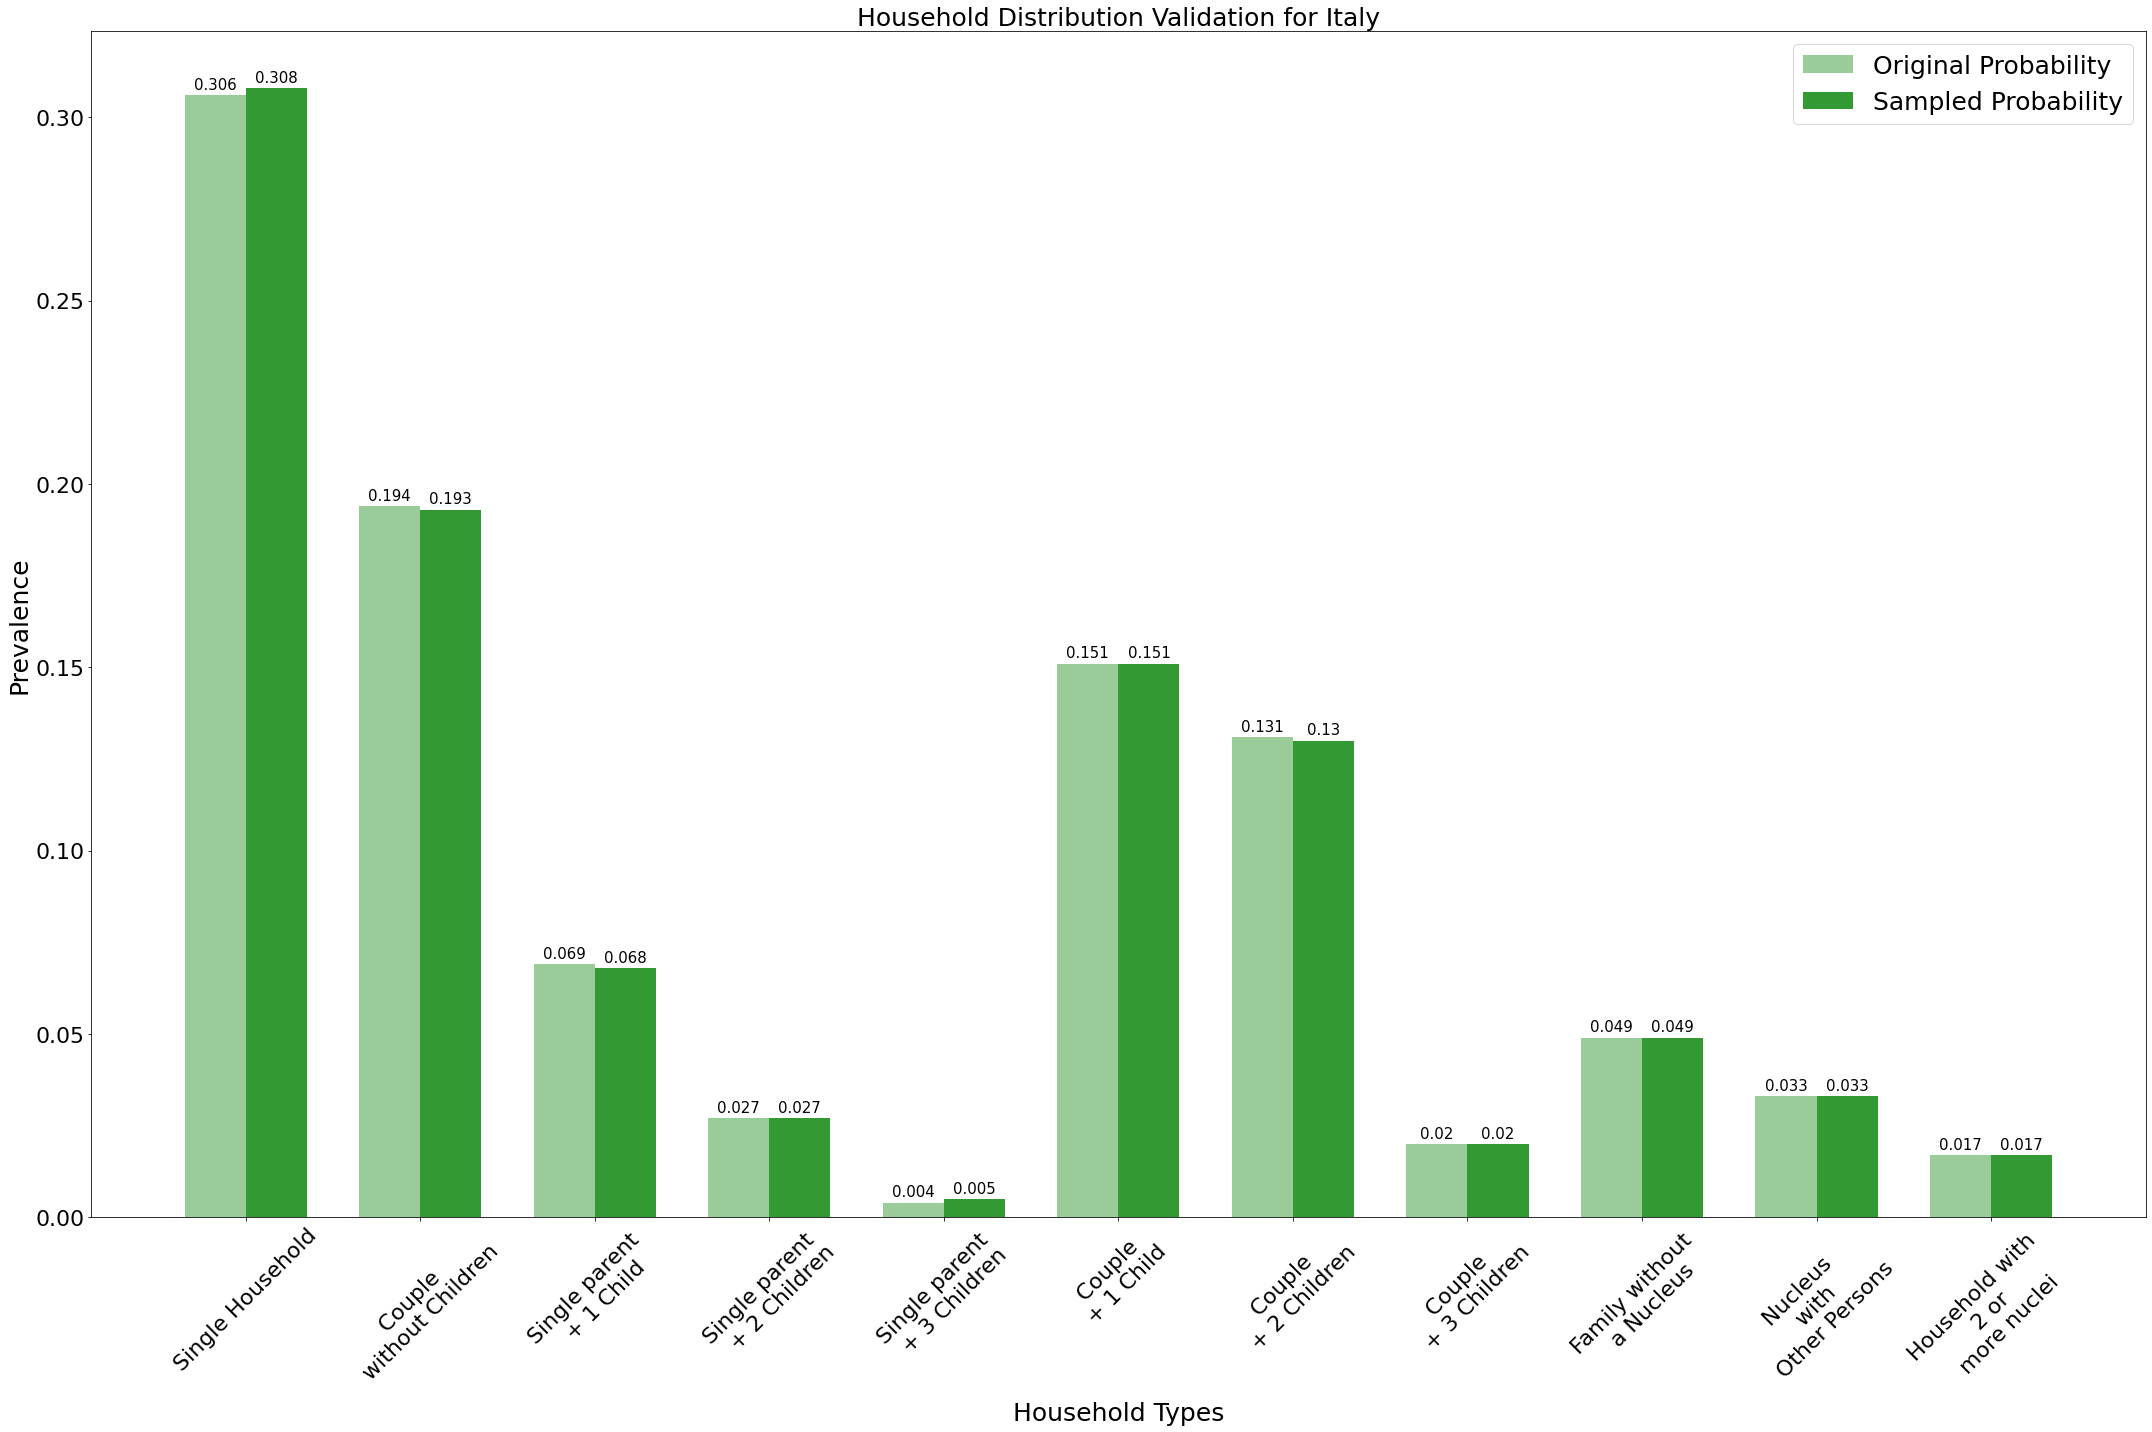

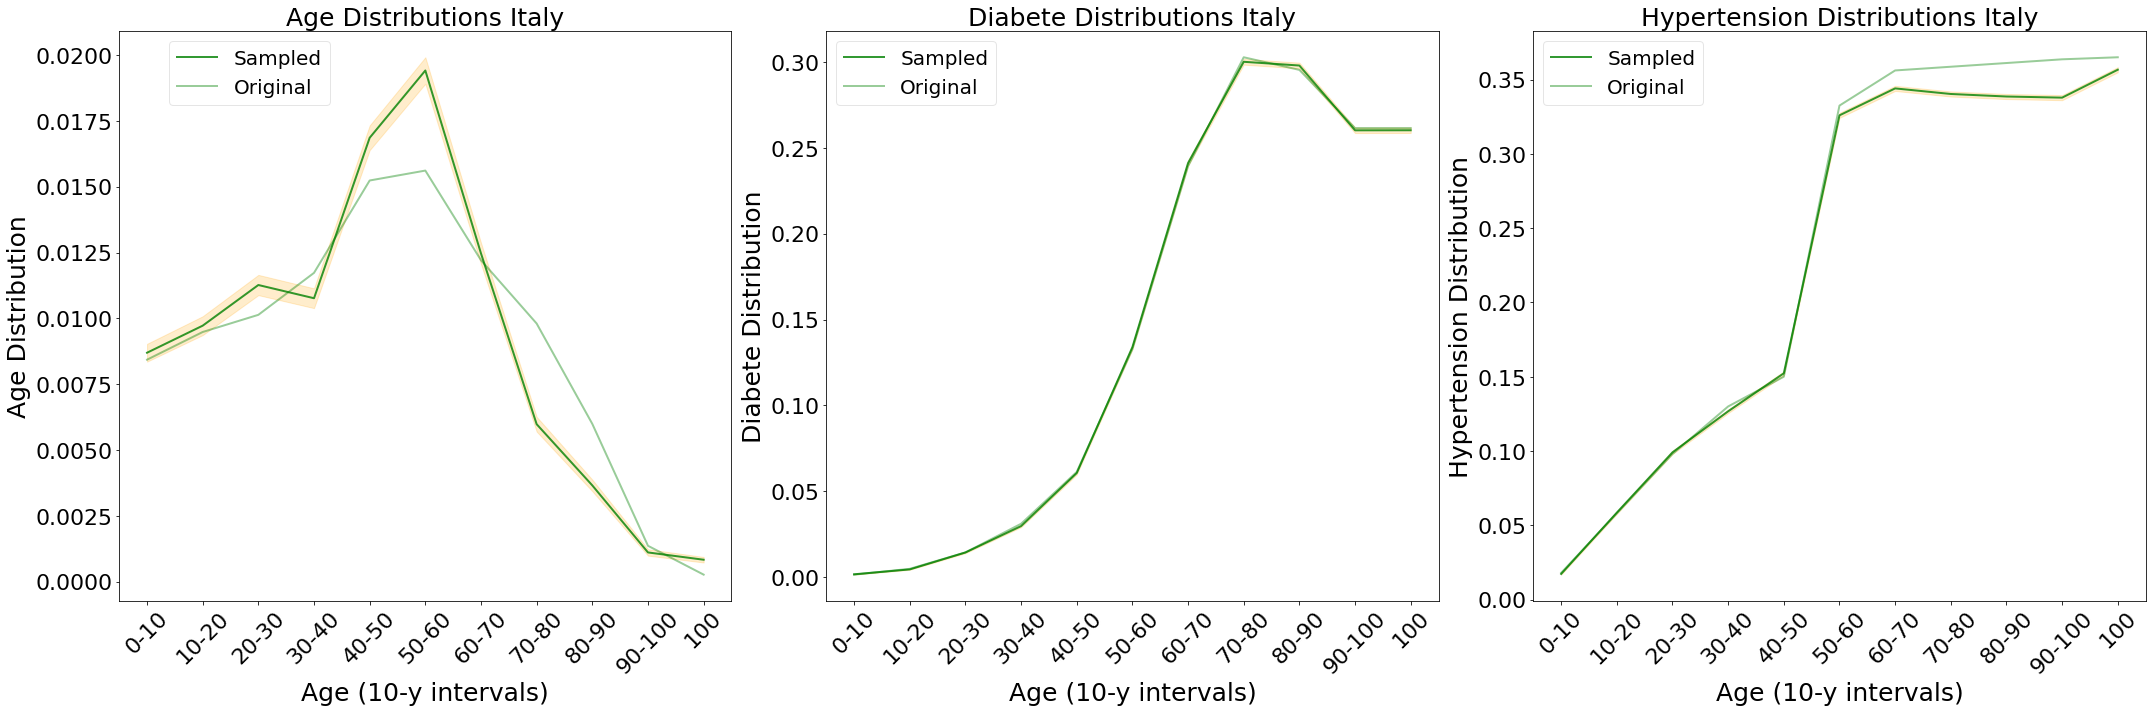

In [3]:
# VALIDATE ITALY SYNTHETIC POPULATION
country = 'Italy' # define the country of interest
n = 500000 # define the pop size 
save_plot = True 
#save_plot = False

hous_ita,hous_ita_sample,age_ita_sample,age_ita,diab_ita_sample,diab_ita,hyp_ita_sample,hyp_ita = validate_population(country,n)

#### 2.2  Spain Plots 
<a id="spa"></a>

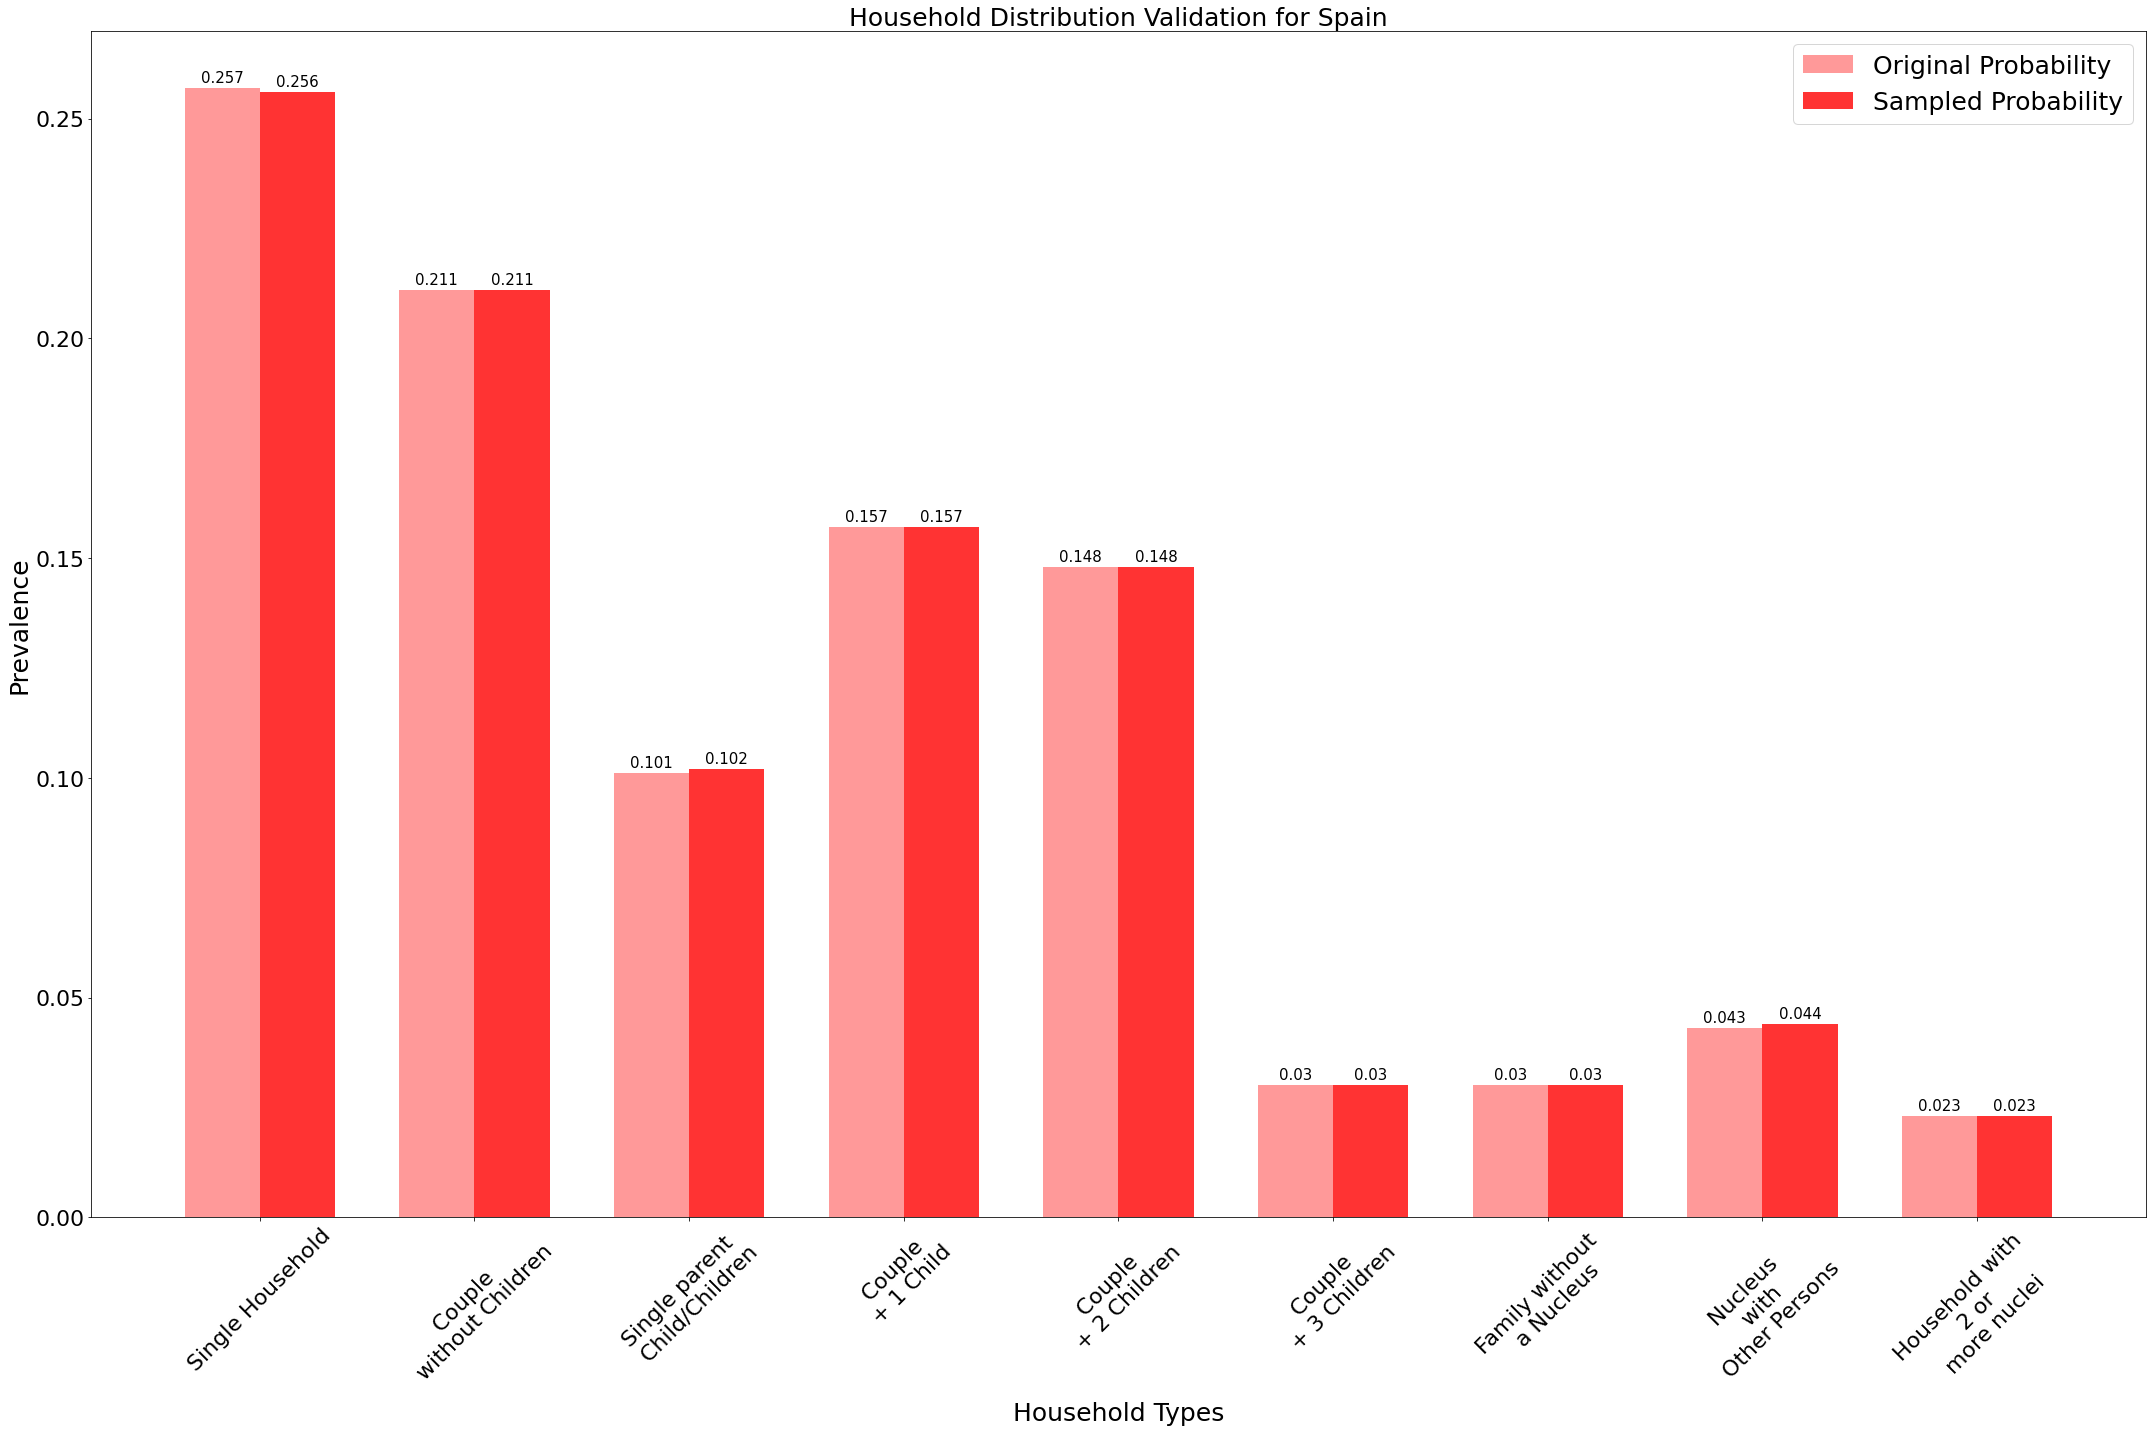

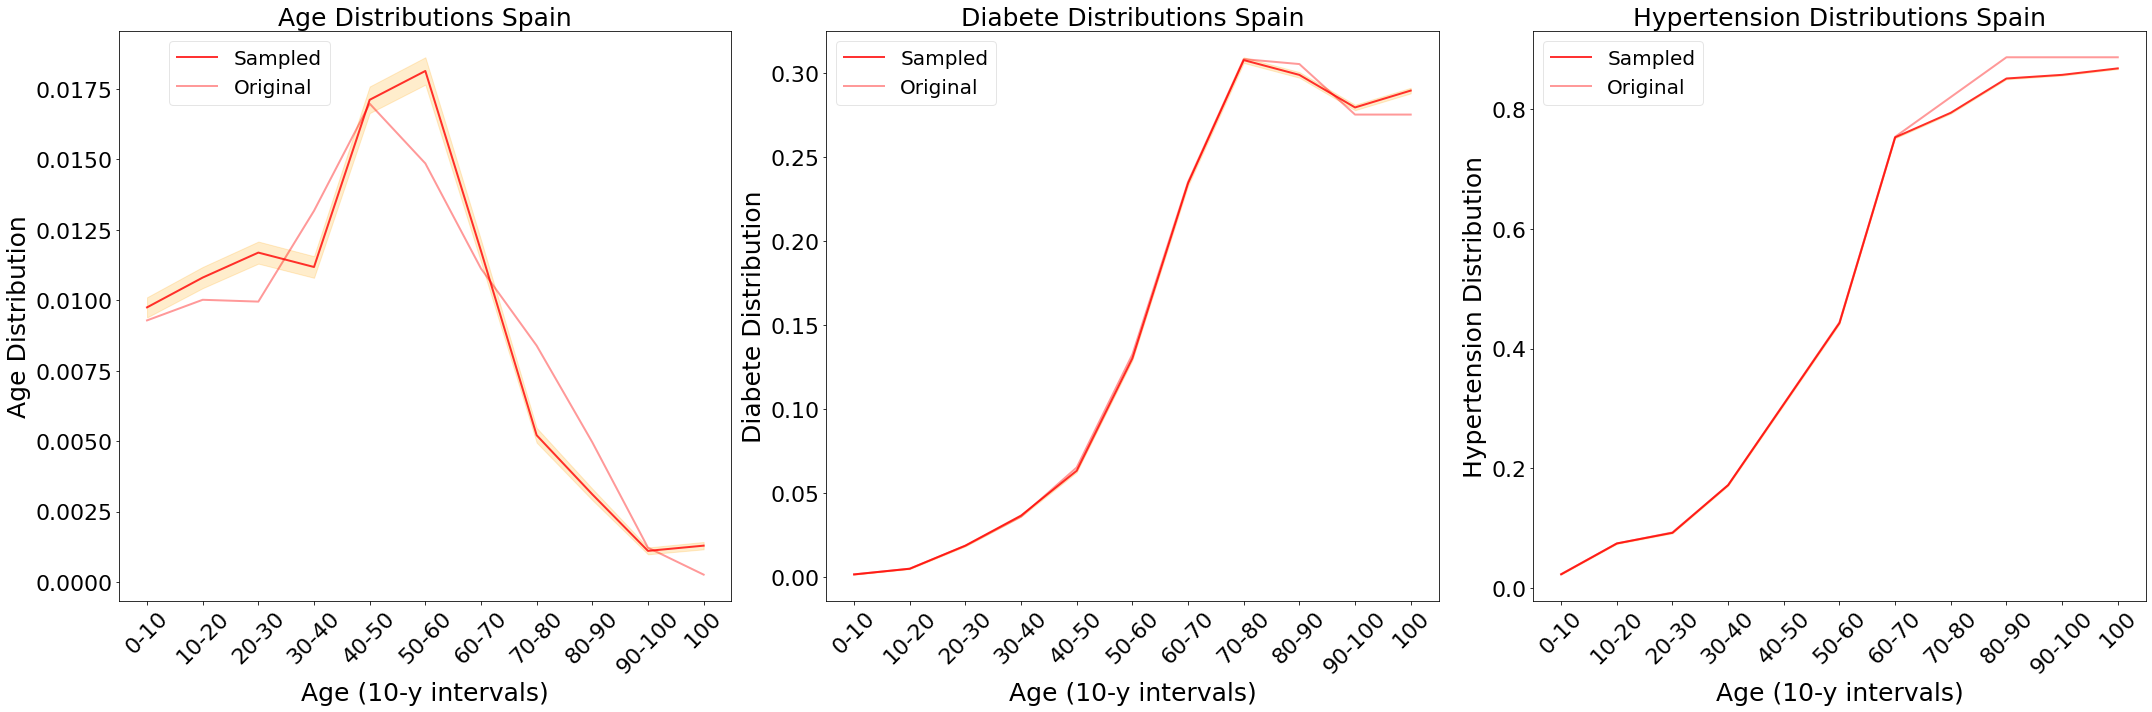

In [4]:
# VALIDATE SPAIN SYNTHETIC POPULATION
country = 'Spain' 
n = 500000 
save_plot = True
#save_plot = False

hous_sp,hous_sp_sample,age_sp,age_sp_sample,diab_sp,diab_sp_sample,hyp_sp,hyp_sp_sample = validate_population(country,n,save_plot)

#### 2.3  Germany Plots 
<a id="ger"></a>

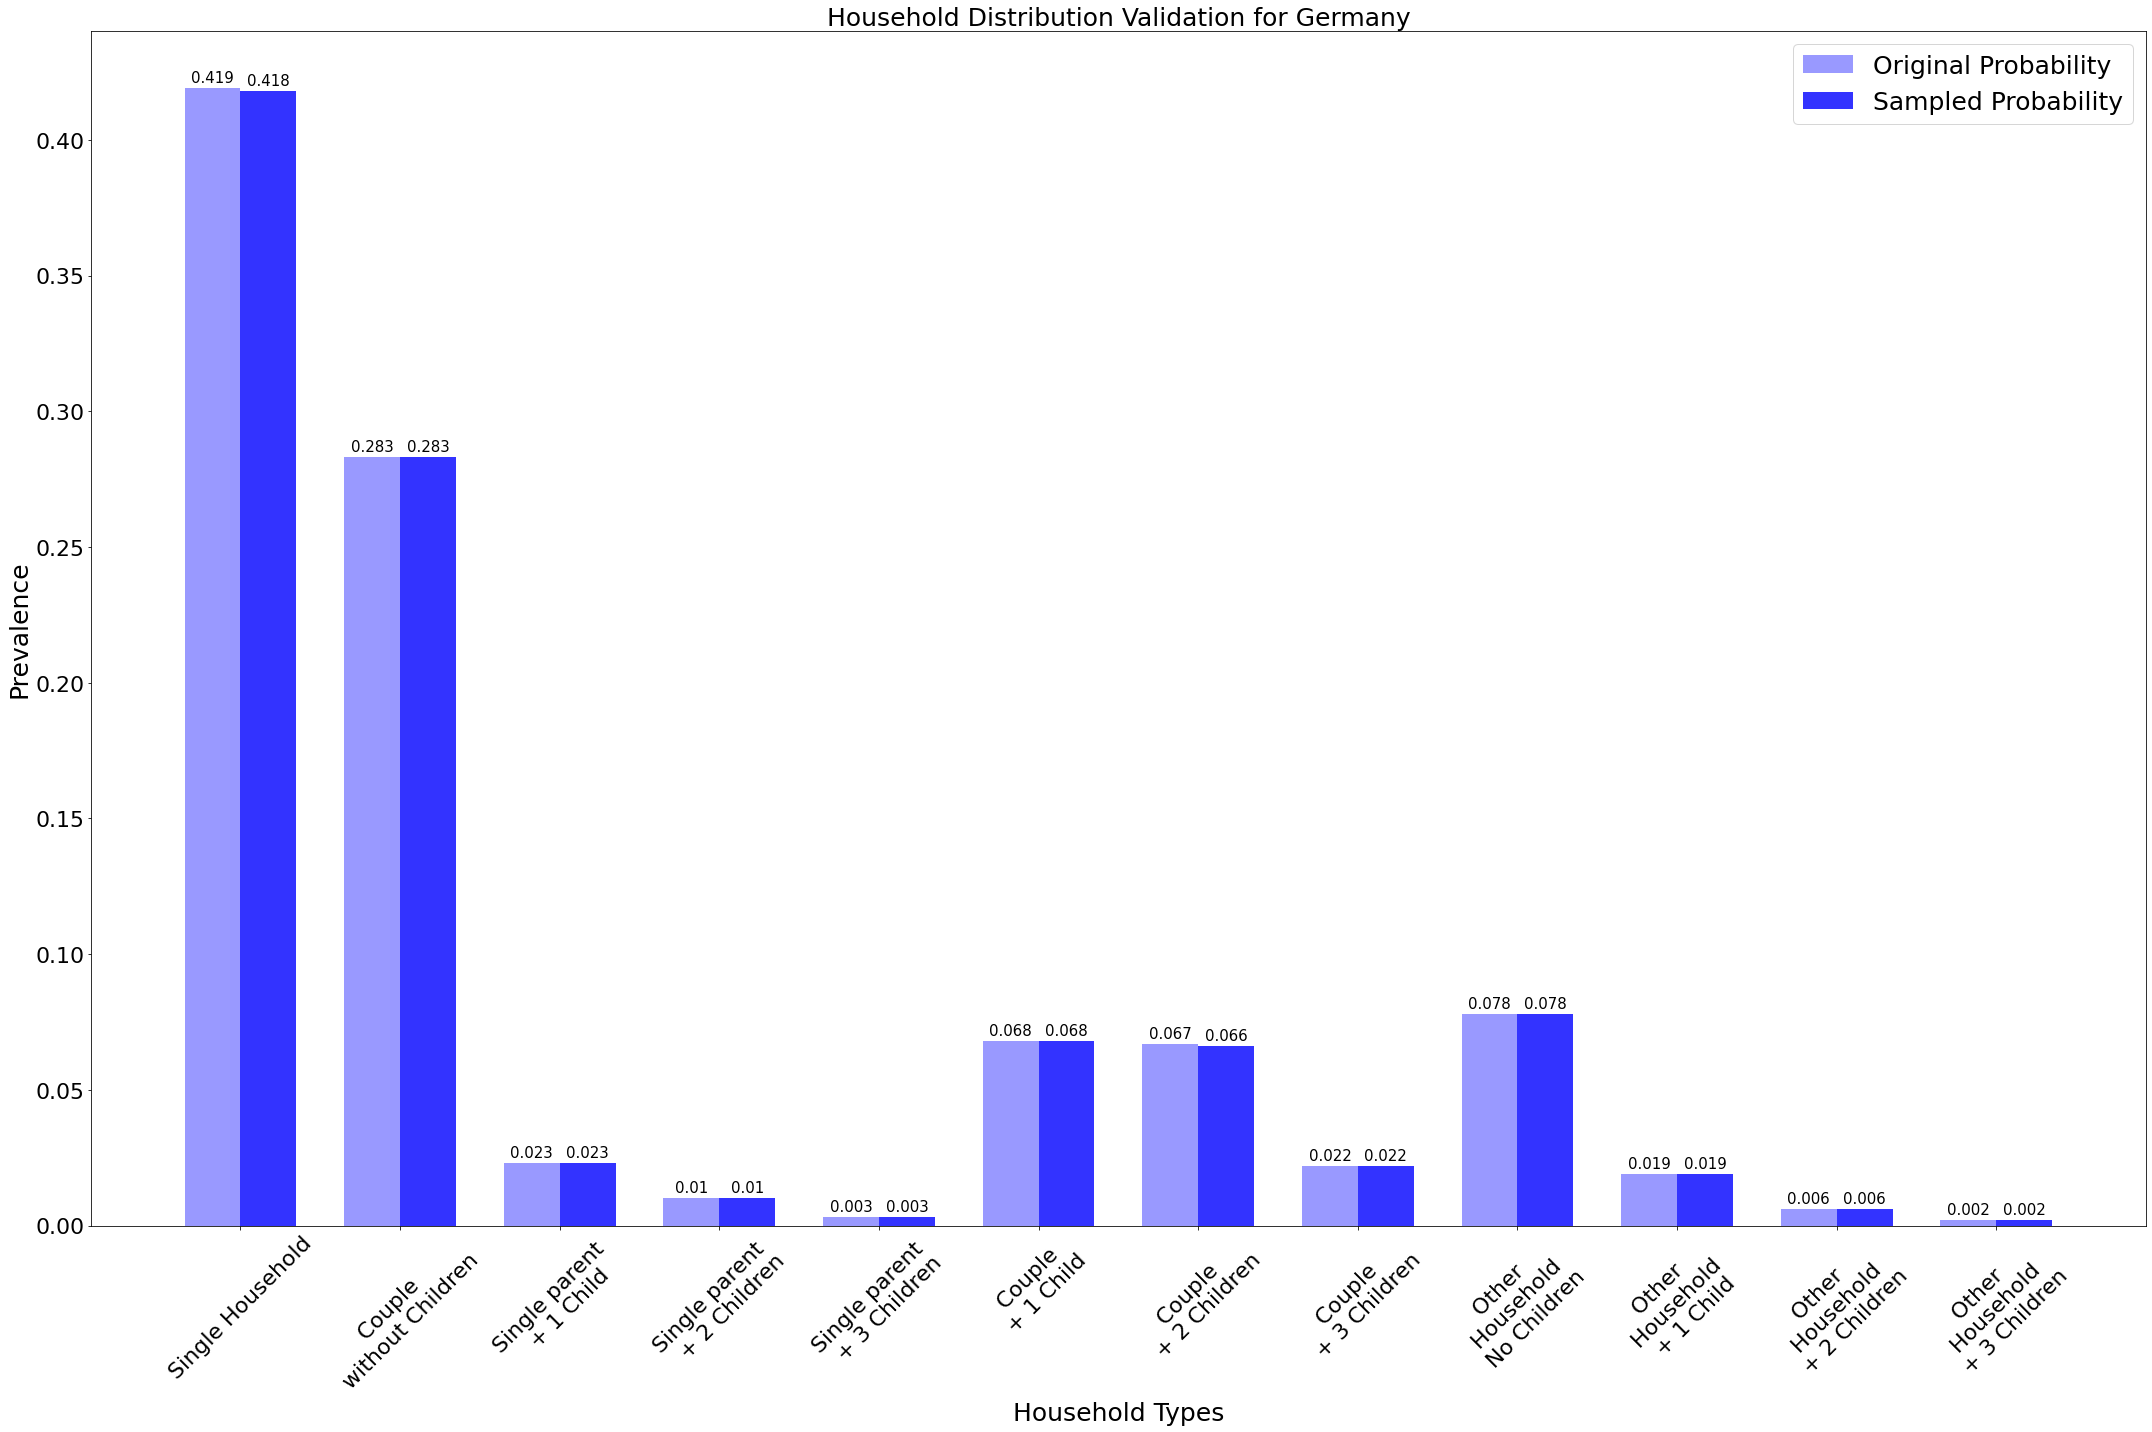

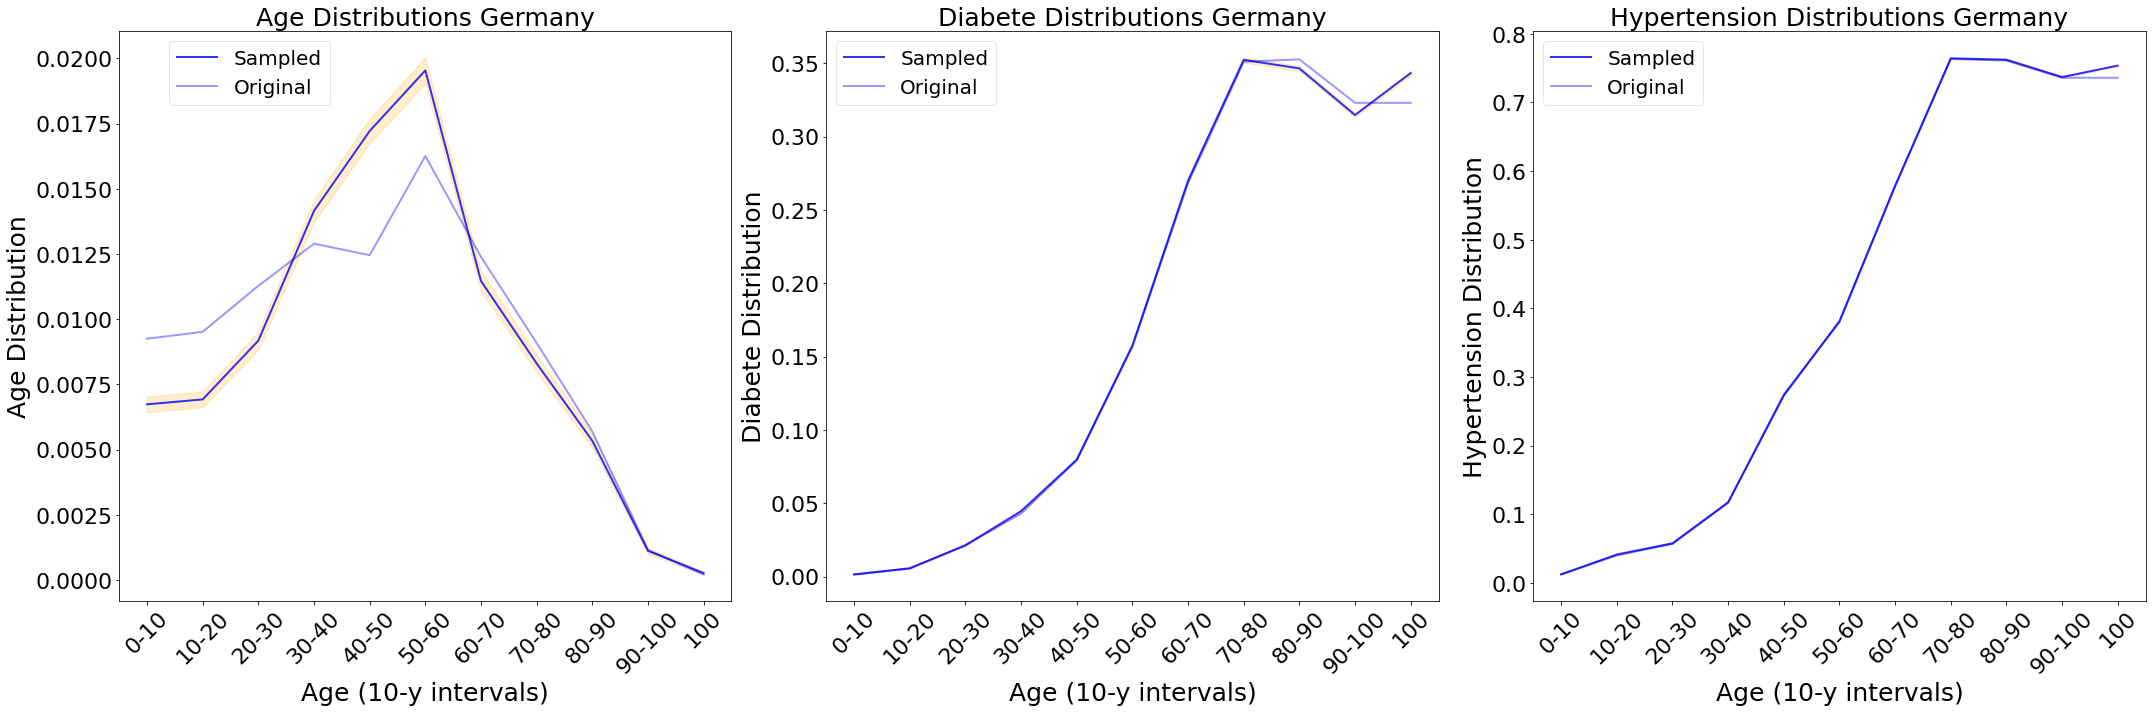

In [5]:
# VALIDATE GERMANY SYNTHETIC POPULATION
country = 'Germany' 
n = 500000 
save_plot = True
#save_plot = False

hous_ger,hous_ger_sample,age_ger,age_ger_sample,diab_ger,diab_ger_sample,hyp_ger,hyp_ger_sample = validate_population(country,n,save_plot)

#### 2.4  France Plots 
<a id="fra"></a>

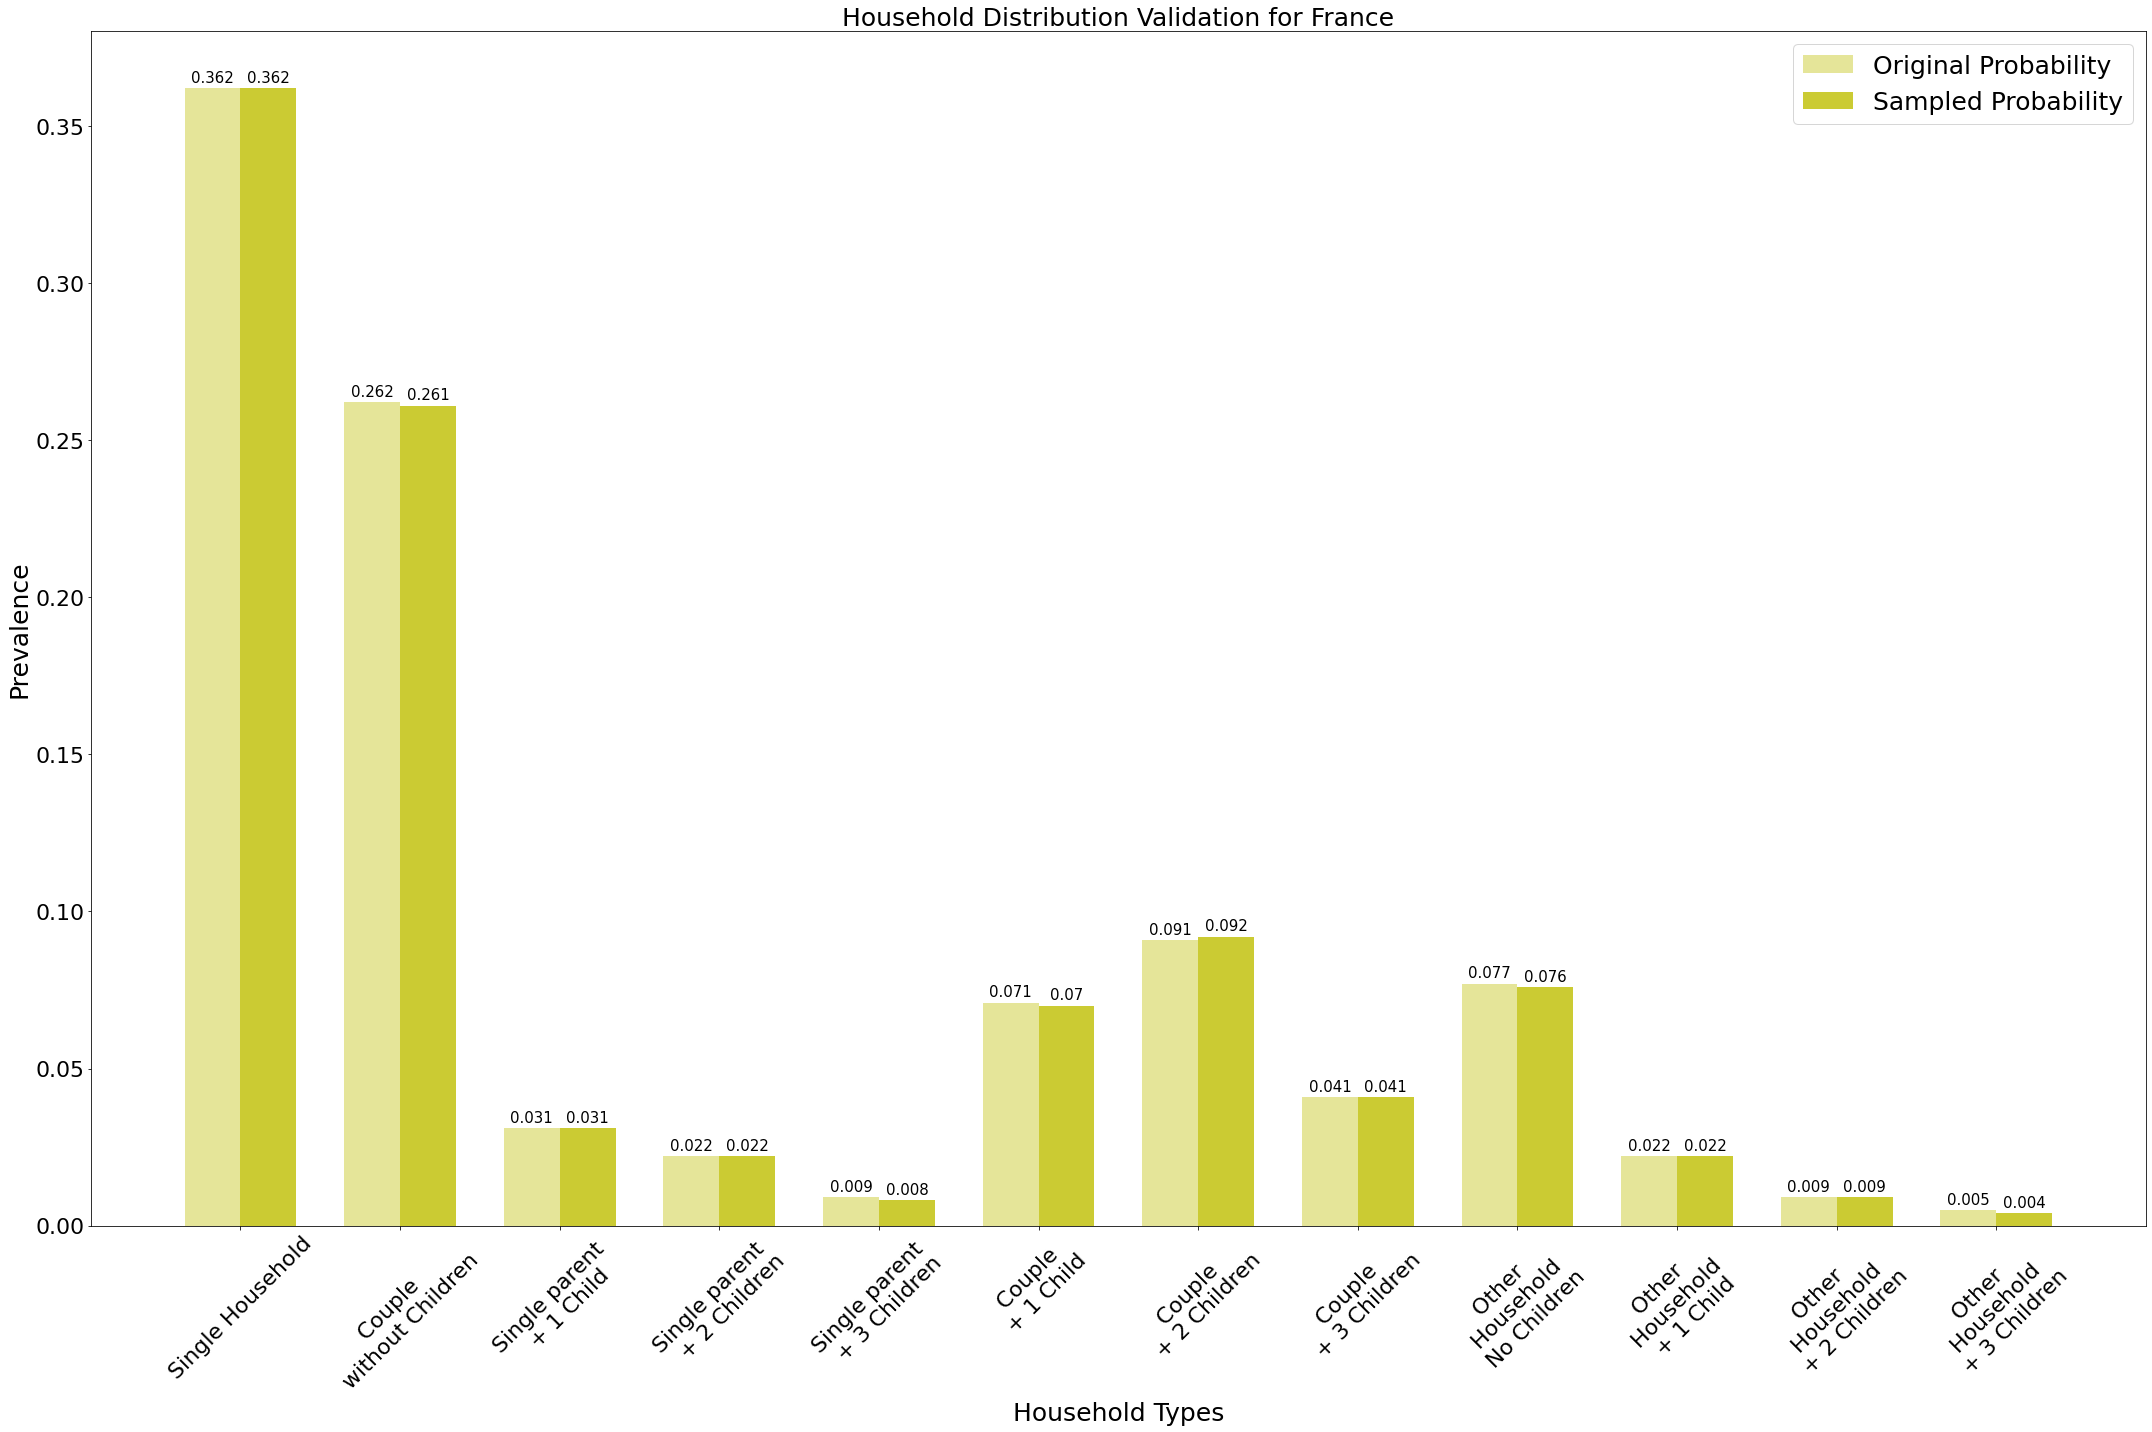

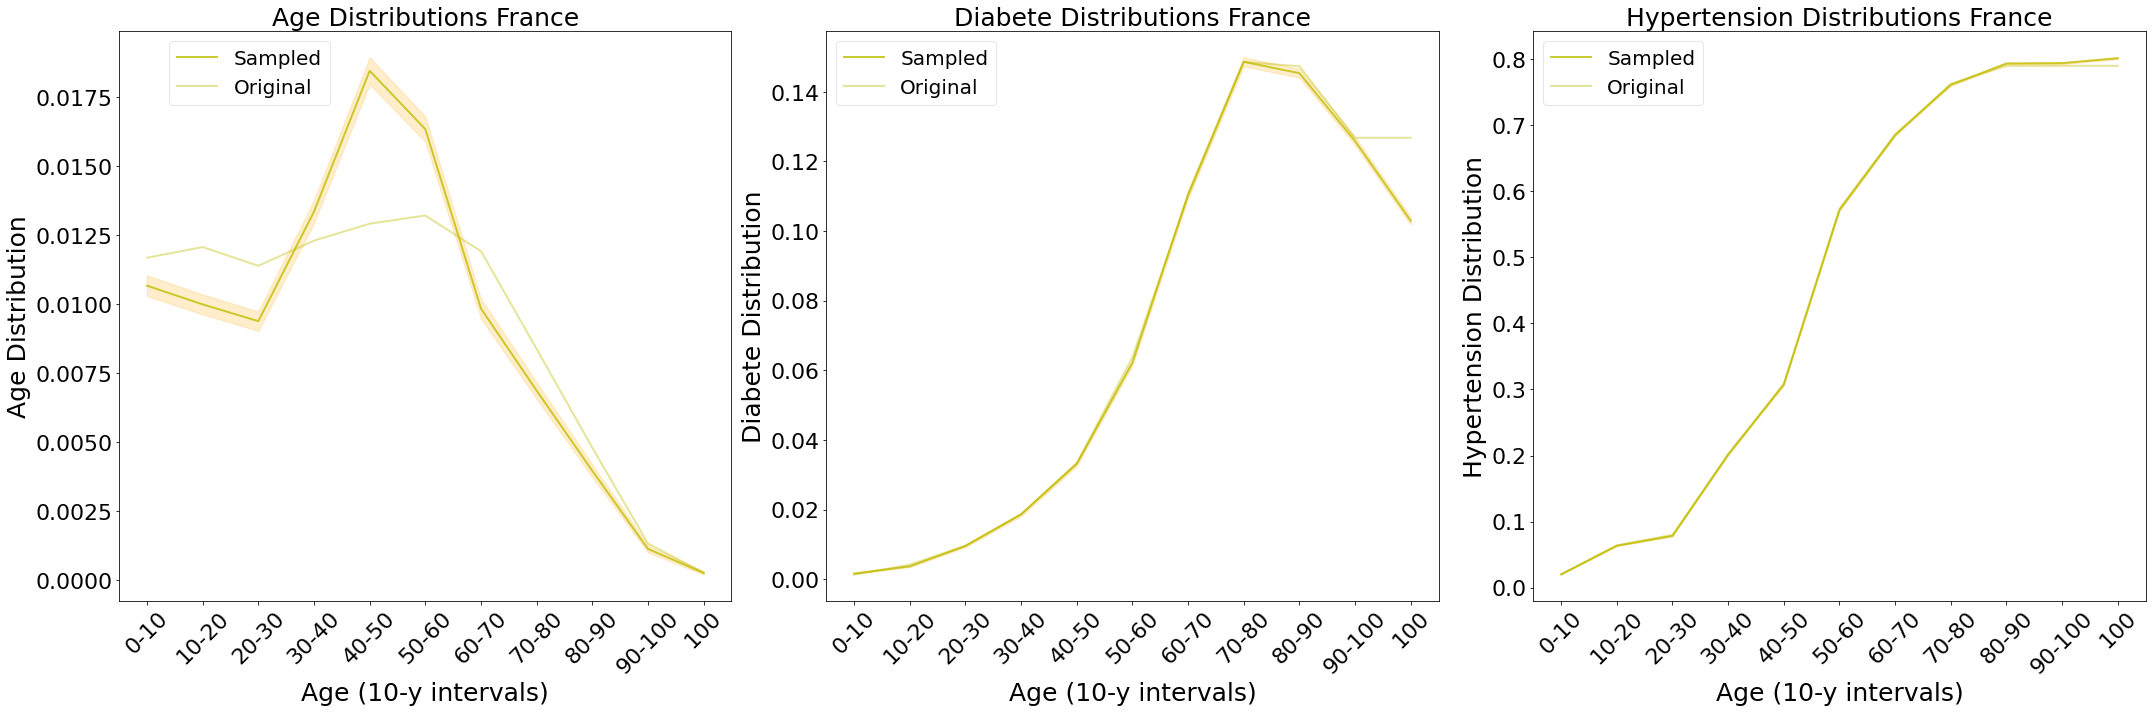

In [6]:
# VALIDATE FRANCE SYNTHETIC POPULATION
country = 'France' 
n = 500000 
save_plot = True
#save_plot = False

hous_fra,hous_fra_sample,age_fra,age_fra_sample,diab_fra,diab_fra_sample,hyp_fra,hyp_fra_sample = validate_population(country,n,save_plot)

### 3. Compare Countries 
<a id="compare"></a>

In [7]:
dic_age = {'Age Interval':['0-10','10-20','20-30','30-40','40-50','50-60','60-70','70-80','80-90','90-100','100'],
            'Ita Orig':age_ita ,'Ita Sample':age_ita_sample,'Spa Orig':age_sp,'Spa Sample':age_sp_sample,'Ger Orig':age_ger,'Ger Sample':age_ger_sample,'Fra Orig':age_fra,'Fra Sample':age_fra_sample}
dic_hyp = {'Age Interval':['0-10','10-20','20-30','30-40','40-50','50-60','60-70','70-80','80-90','90-100','100'],
            'Ita Orig':hyp_ita ,'Ita Sample':hyp_ita_sample,'Spa Orig':hyp_sp,'Spa Sample':hyp_sp_sample,'Ger Orig':hyp_ger,'Ger Sample':hyp_ger_sample,'Fra Orig':hyp_fra,'Fra Sample':hyp_fra_sample}
dic_diab = {'Age Interval':['0-10','10-20','20-30','30-40','40-50','50-60','60-70','70-80','80-90','90-100','100'],
            'Ita Orig':diab_ita ,'Ita Sample':diab_ita_sample,'Spa Orig':diab_sp,'Spa Sample':diab_sp_sample,'Ger Orig':diab_ger,'Ger Sample':diab_ger_sample,'Fra Orig':diab_fra,'Fra Sample':diab_fra_sample}

age_df = pd.DataFrame(dic_age)
hyp_df = pd.DataFrame(dic_hyp)
diab_df = pd.DataFrame(dic_diab)

age_df = age_df.round(4)
hyp_df = hyp_df.round(4)
diab_df = diab_df.round(4)

#### 3.1  Compare Household Distributions
<a id="compare_house"></a>

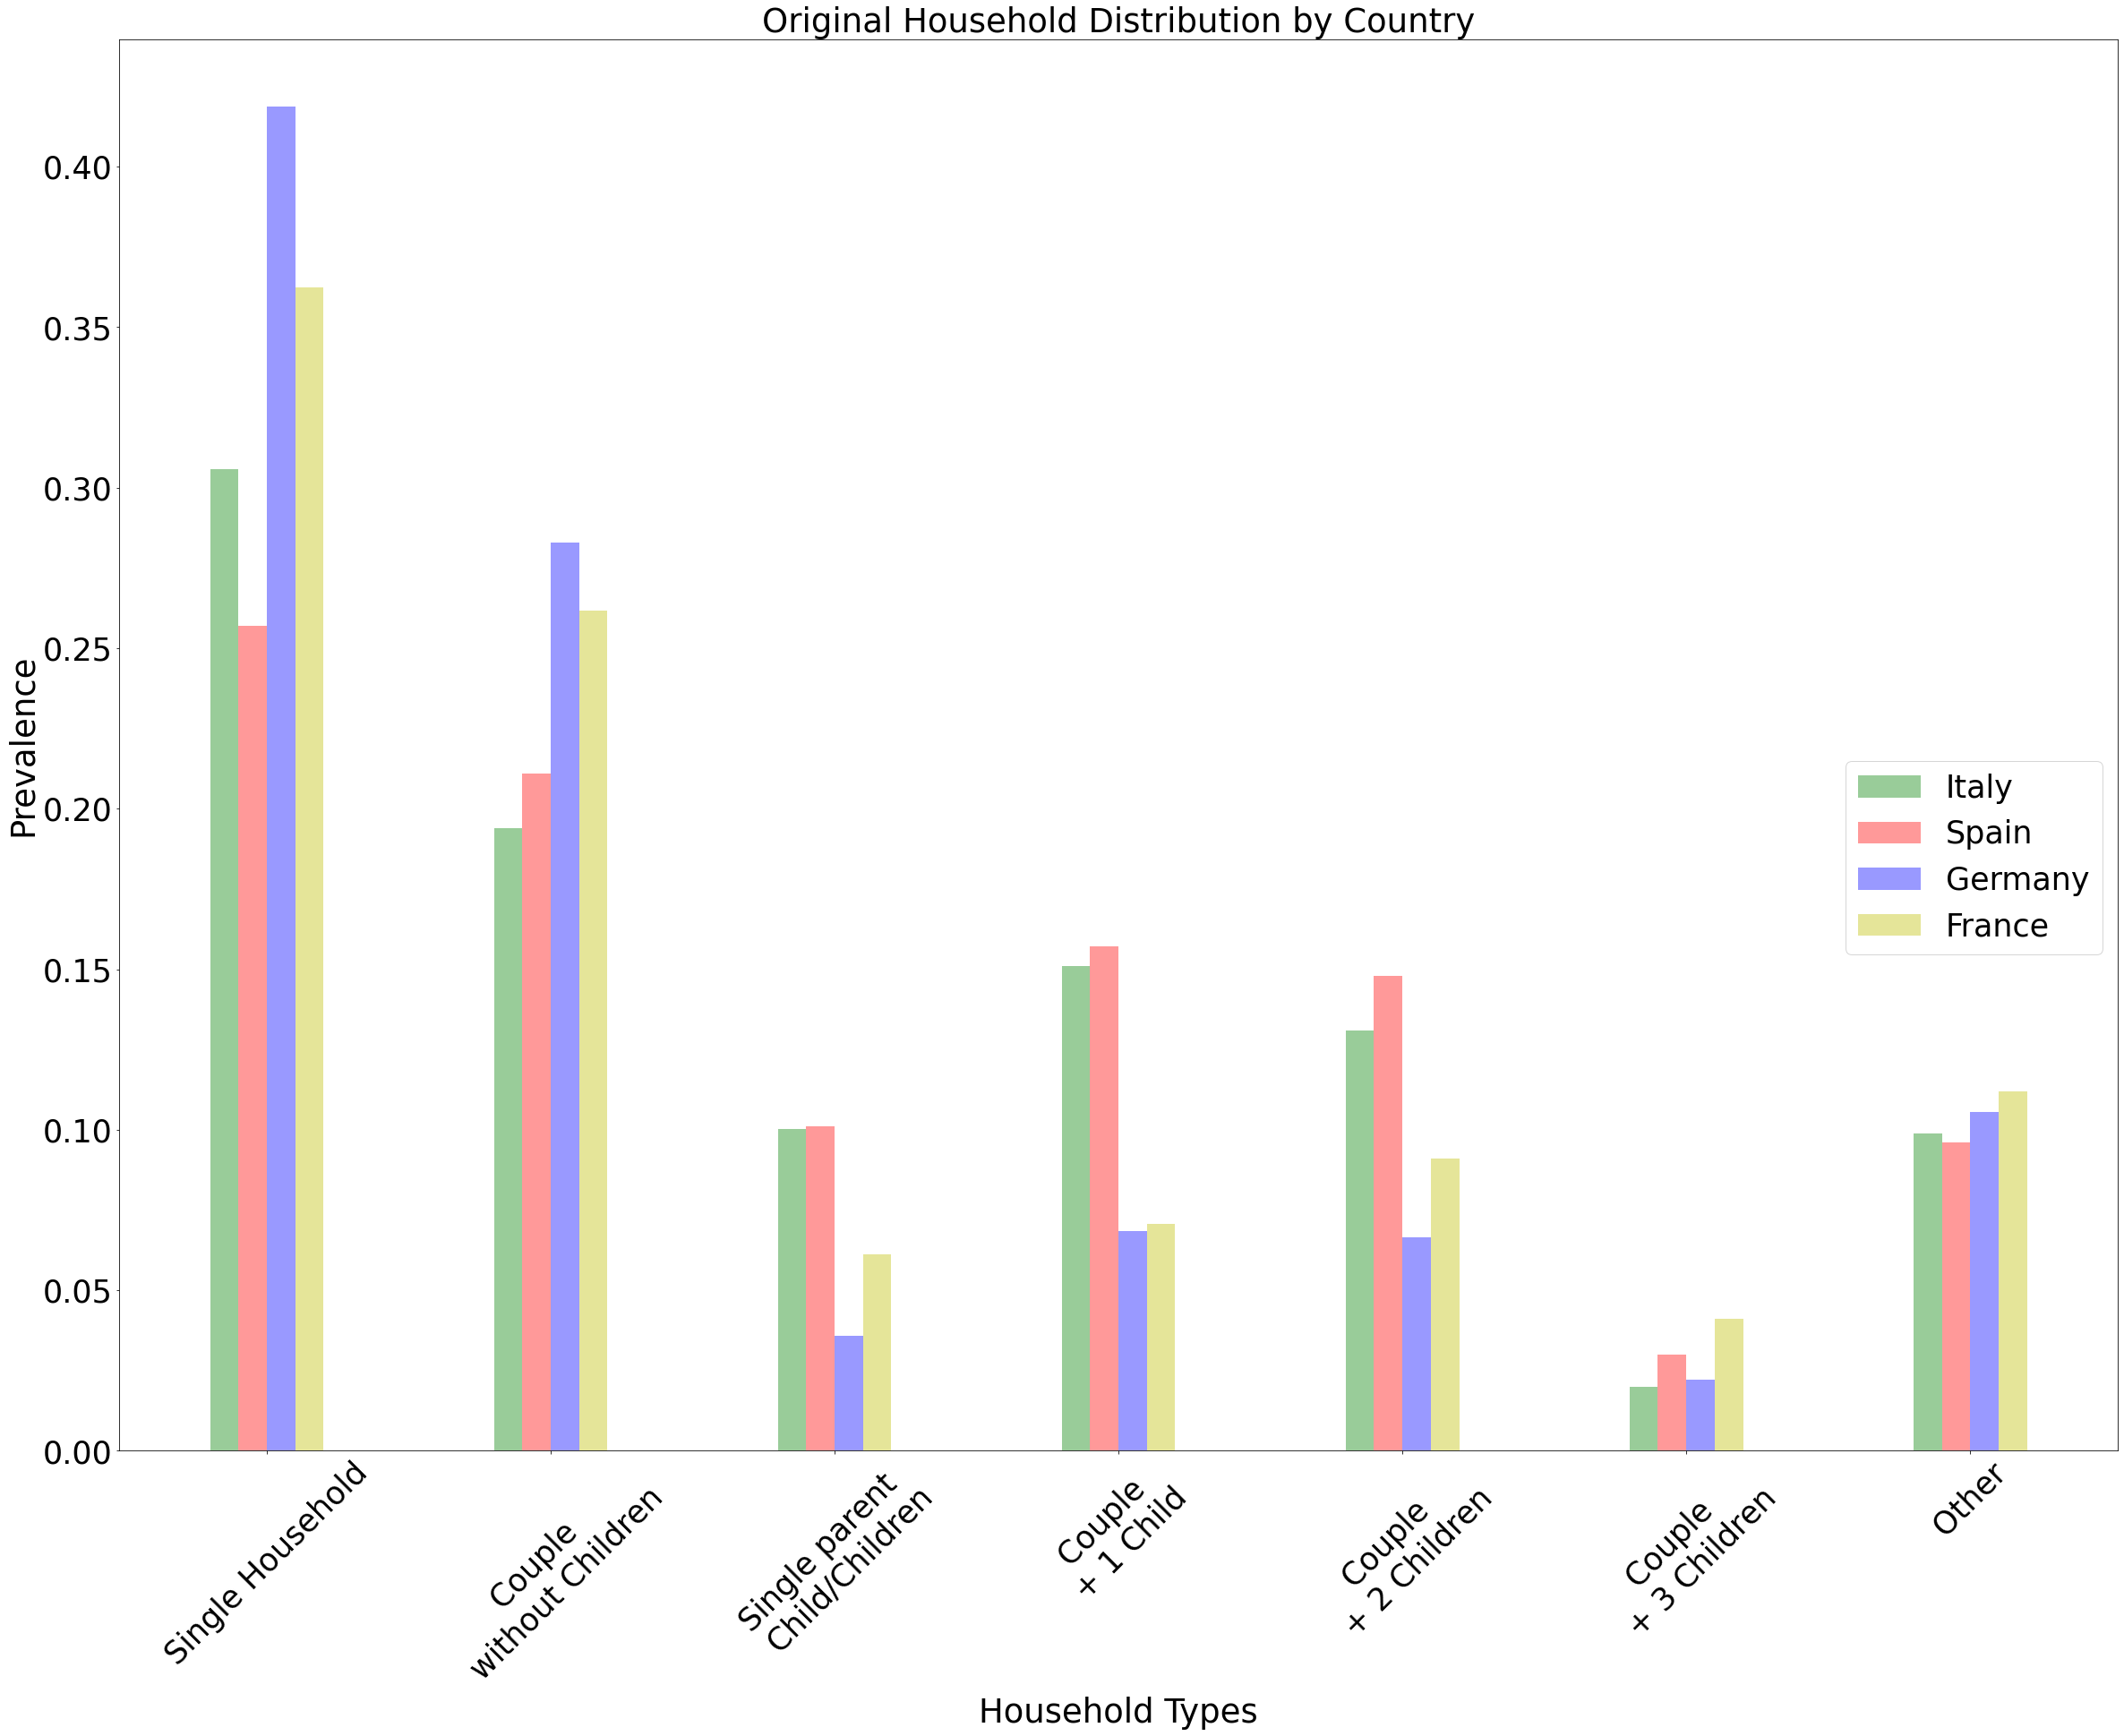

In [8]:
### COMPARE HOUSEHOLD DISTRIBUTION ###
#save_plot = False
save_plot = True

# Set the Household Types which are shared across all countries ++ cluster all non-shared nuclei into 'Other' category
household_types = ['Single Household','Couple \n without Children','Single parent \n Child/Children',
                       'Couple \n+ 1 Child','Couple \n + 2 Children','Couple \n + 3 Children','Other']

###### ITALY ###### 
# Build array for household probabilities in Italy
household_probs_ita = np.array([0.309179, 0.196000,(0.0694283 + 0.0273065 + 0.00450268), 
                                0.152655, 0.132429, 0.0200969, (0.049821 + 0.033 + 0.017)])
household_probs_ita /= household_probs_ita.sum()

###### SPAIN ###### 
# Build array for household probabilities in Spain
household_probs_spain = np.array([0.257, 0.211 , 0.101, 0.157, 0.148, 0.030, (0.030 + 0.043 + 0.023)])
household_probs_spain /= household_probs_spain.sum()

###### GERMANY ###### 
# Build array for household probabilities in Germany
household_probs_ger = np.array([0.4184, 0.2828, (0.0226 + 0.0103 + 0.0028),
                                0.0684, 0.0665, 0.0222, (0.0780 + 0.0192+0.0061+0.0021)])
household_probs_ger /= household_probs_ger.sum()

###### FRANCE ###### 
# Build array for household probabilities in France
household_probs_fra = np.array([0.3622,0.2616, (0.0309+0.0218+0.0086), 
                                0.0707,0.0909, 0.0410, (0.0768+0.0217+0.0086+0.0046)])
household_probs_fra /= household_probs_fra.sum()

# Build Dataset 
df = pd.DataFrame() # initialize the dataset
df['Labels'] = household_types # Lables Column containing the category names for the households
df['Italy'] = household_probs_ita
df['Spain'] = household_probs_spain
df['Germany'] = household_probs_ger
df['France'] = household_probs_fra

#### PLOTS ####
# Plot Household Type Distribution
labels = df['Labels'] # labels for the barplot

x = np.arange(len(labels))  # the label locations
width = 0.10  # the width of the bars
fig, ax = plt.subplots(figsize=(40,29))
rects1 = ax.bar(x - 3*width/2 ,df['Italy'].round(4), width, label='Italy',alpha=0.4, color = 'g')
rects2 = ax.bar(x - width/2,df['Spain'].round(4), width, label='Spain',alpha = 0.4, color = 'r')
rects3 = ax.bar(x + width/2,df['Germany'].round(4), width,label='Germany',alpha = 0.4, color = 'b')
rects4 = ax.bar(x + 3*width/2,df['France'].round(4), width, label='France',alpha = 0.4, color = 'y')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Prevalence',fontsize=37)
ax.set_xlabel('Household Types',fontsize=37)
ax.set_title('Original Household Distribution by Country',fontsize=37)
ax.set_xticks(x)
ax.set_xticklabels(labels,fontsize=35,rotation=45)
ax.legend(loc='best', bbox_to_anchor=(1.0, 0.5),fontsize=35);

if save_plot == True:
    plt.yticks(fontsize=35)
    plt.savefig(os.path.join(target_dir,'HouseholdDistr_Comparison.jpg'))
    plt.show()
else:
    plt.show()

#### 3.2  Compare Age Distributions
<a id="compare_age"></a>

##### (1) VERTICAL BARPLOT

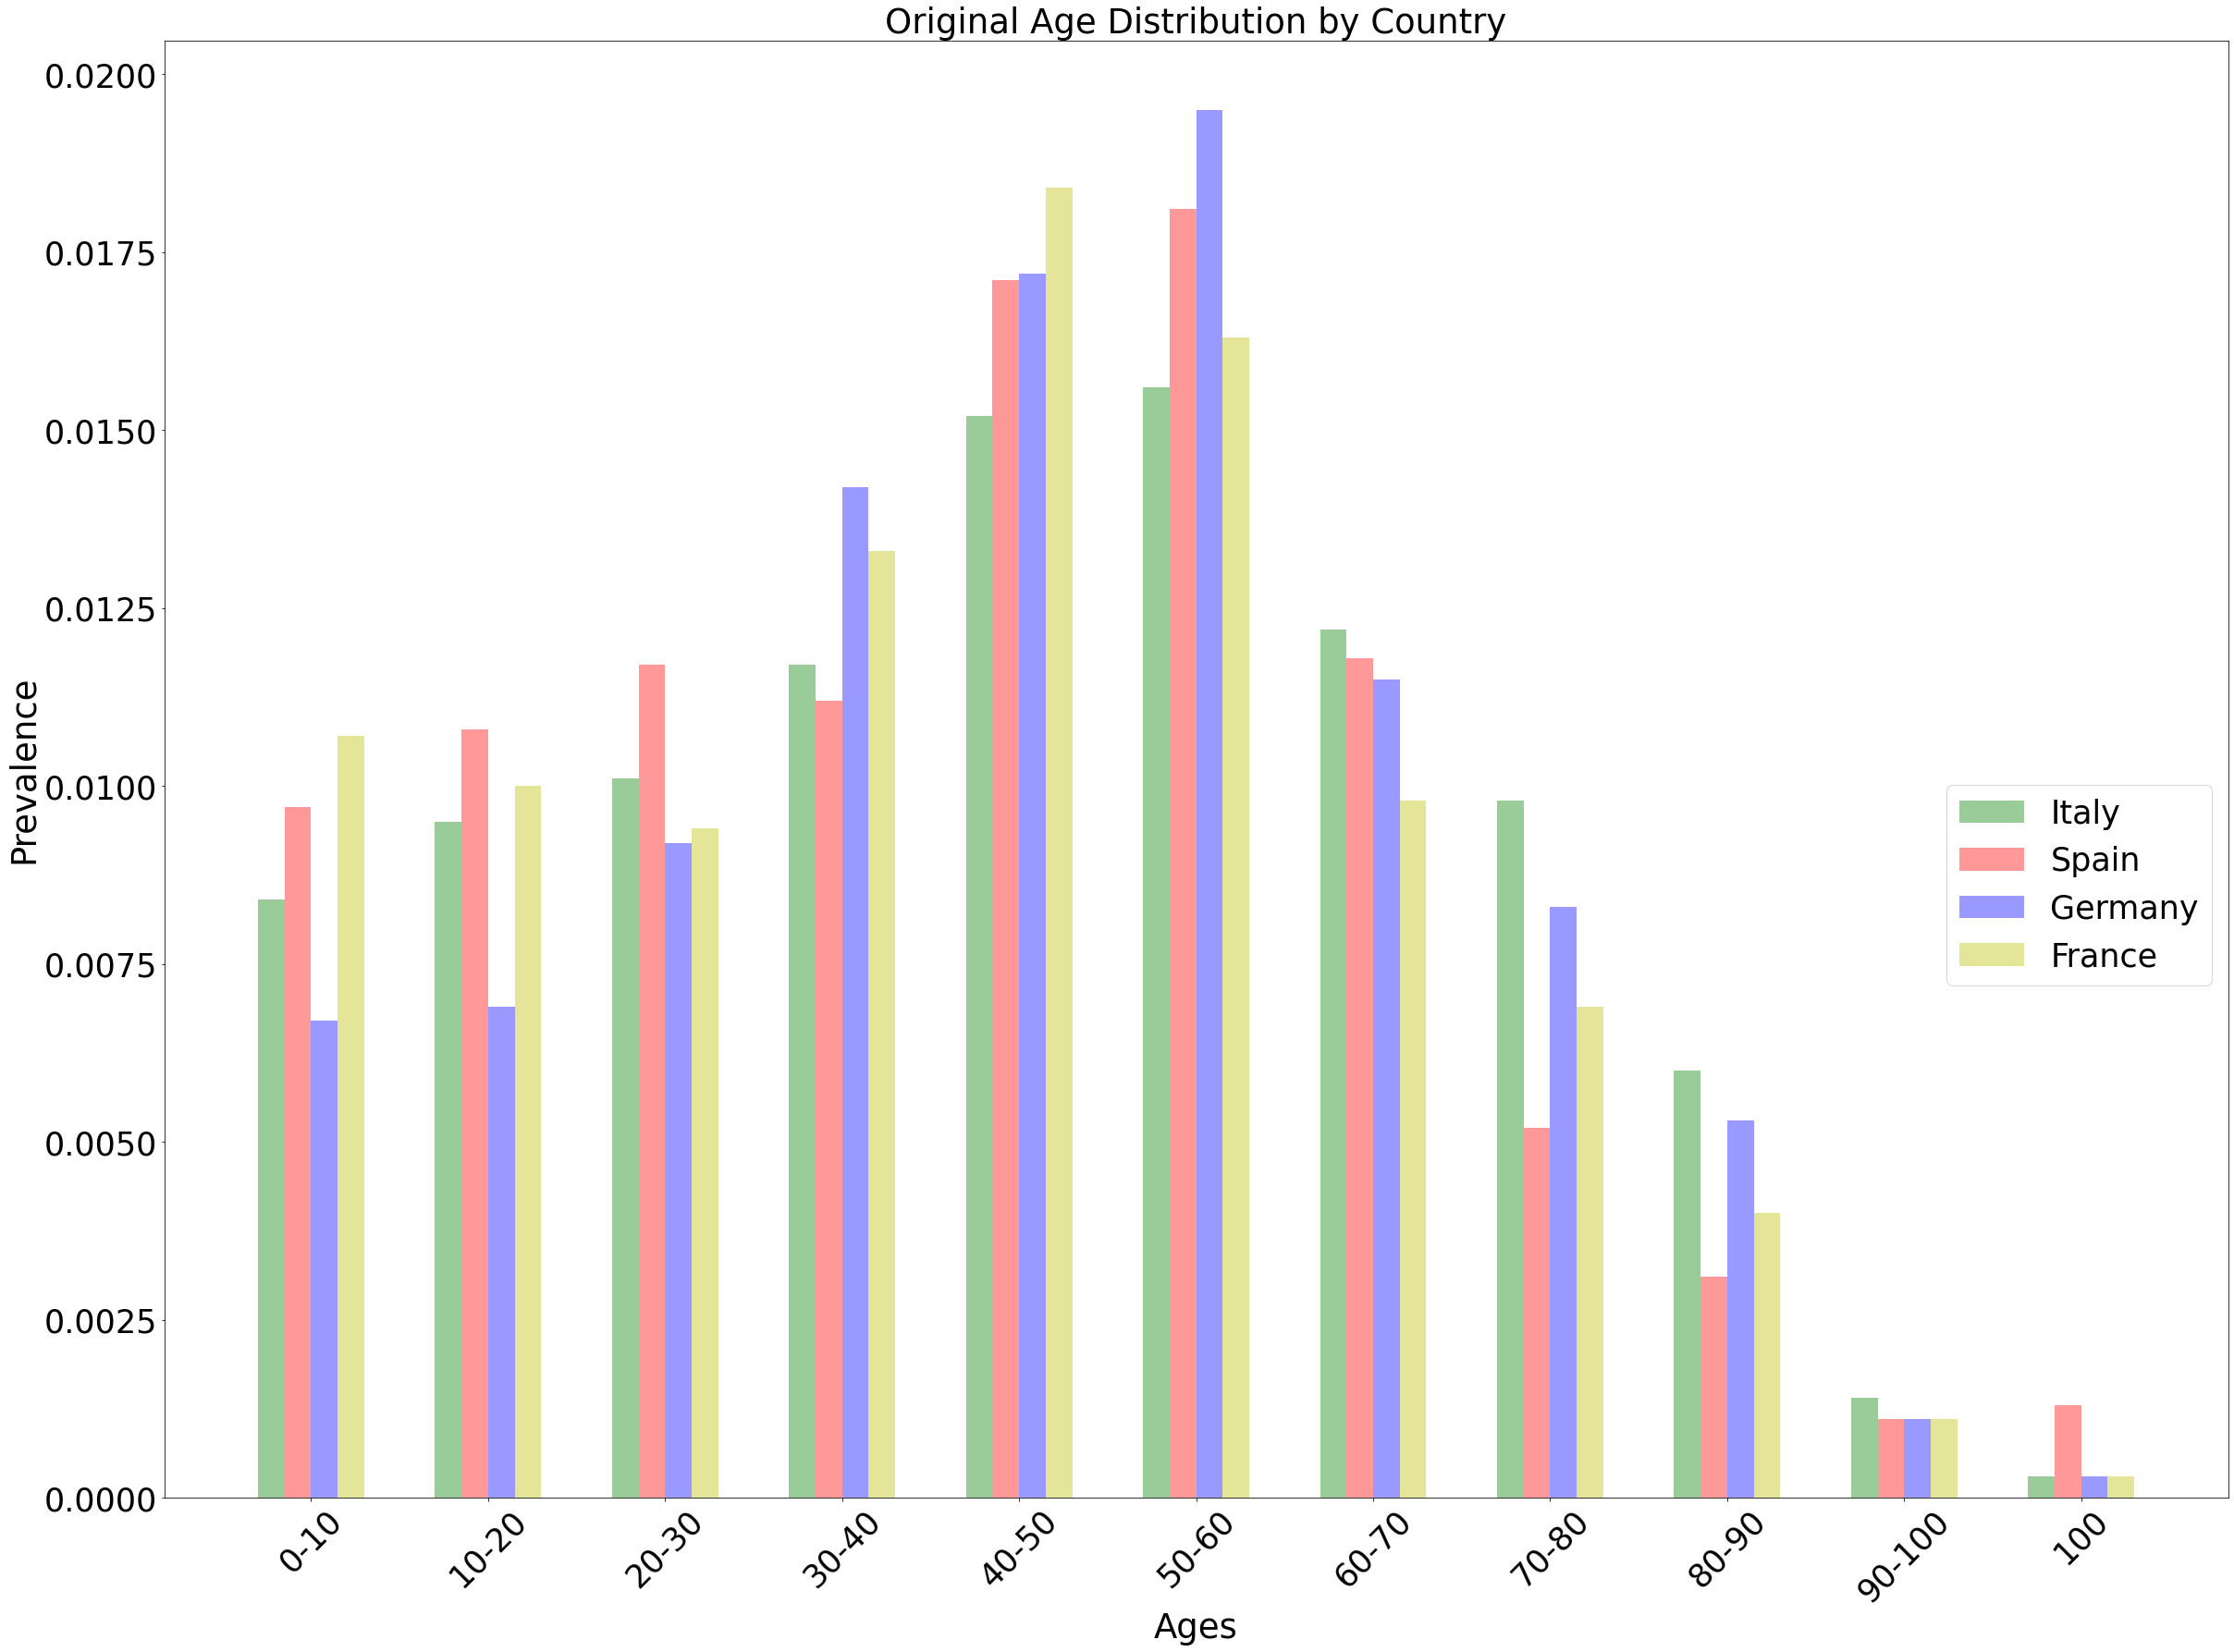

In [9]:
### BAR PLOT COMPARING COUNTRIES SAMPLED AGE DISTRIBUTION
save_plot = True
#save_plot = False
labels = age_df['Age Interval'] # labels for the barplot

x = np.arange(len(labels))  # the label locations
width = 0.15  # the width of the bars
fig, ax = plt.subplots(figsize=(40,29))
rects1 = ax.bar(x - 3*width/2 ,age_df['Ita Orig'].round(4), width, label='Italy',alpha=0.4, color = 'g')
rects2 = ax.bar(x - width/2,age_df['Spa Orig'].round(4), width, label='Spain',alpha = 0.4, color = 'r')
rects3 = ax.bar(x + width/2,age_df['Ger Orig'].round(4), width,label='Germany',alpha = 0.4, color = 'b')
rects4 = ax.bar(x + 3*width/2,age_df['Fra Orig'].round(4), width, label='France',alpha = 0.4, color = 'y')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Prevalence',fontsize=37)
ax.set_xlabel('Ages',fontsize=37)
ax.set_title('Original Age Distribution by Country',fontsize=37)
ax.set_xticks(x)
ax.set_xticklabels(labels,fontsize=35, rotation=45)
#ax.legend(fontsize=10)
ax.legend(loc='best', bbox_to_anchor=(1.0, 0.5),fontsize=35);

#ax.bar_label(rects1, padding=3,fontsize=8)
#ax.bar_label(rects2, padding=3,fontsize=8)
#ax.bar_label(rects3, padding=3,fontsize=8)
#ax.bar_label(rects4, padding=3,fontsize=8)
#fig.tight_layout()

if save_plot == True:
    plt.yticks(fontsize=35)
    plt.savefig(os.path.join(target_dir,'AgeDistr_Comparison.jpg'))
    plt.show()
else:
    plt.show()

##### (2) HORIZONTAL BARPLOT

#### 3.3  Compare Hypertension Distributions
<a id="compare_hyp"></a>

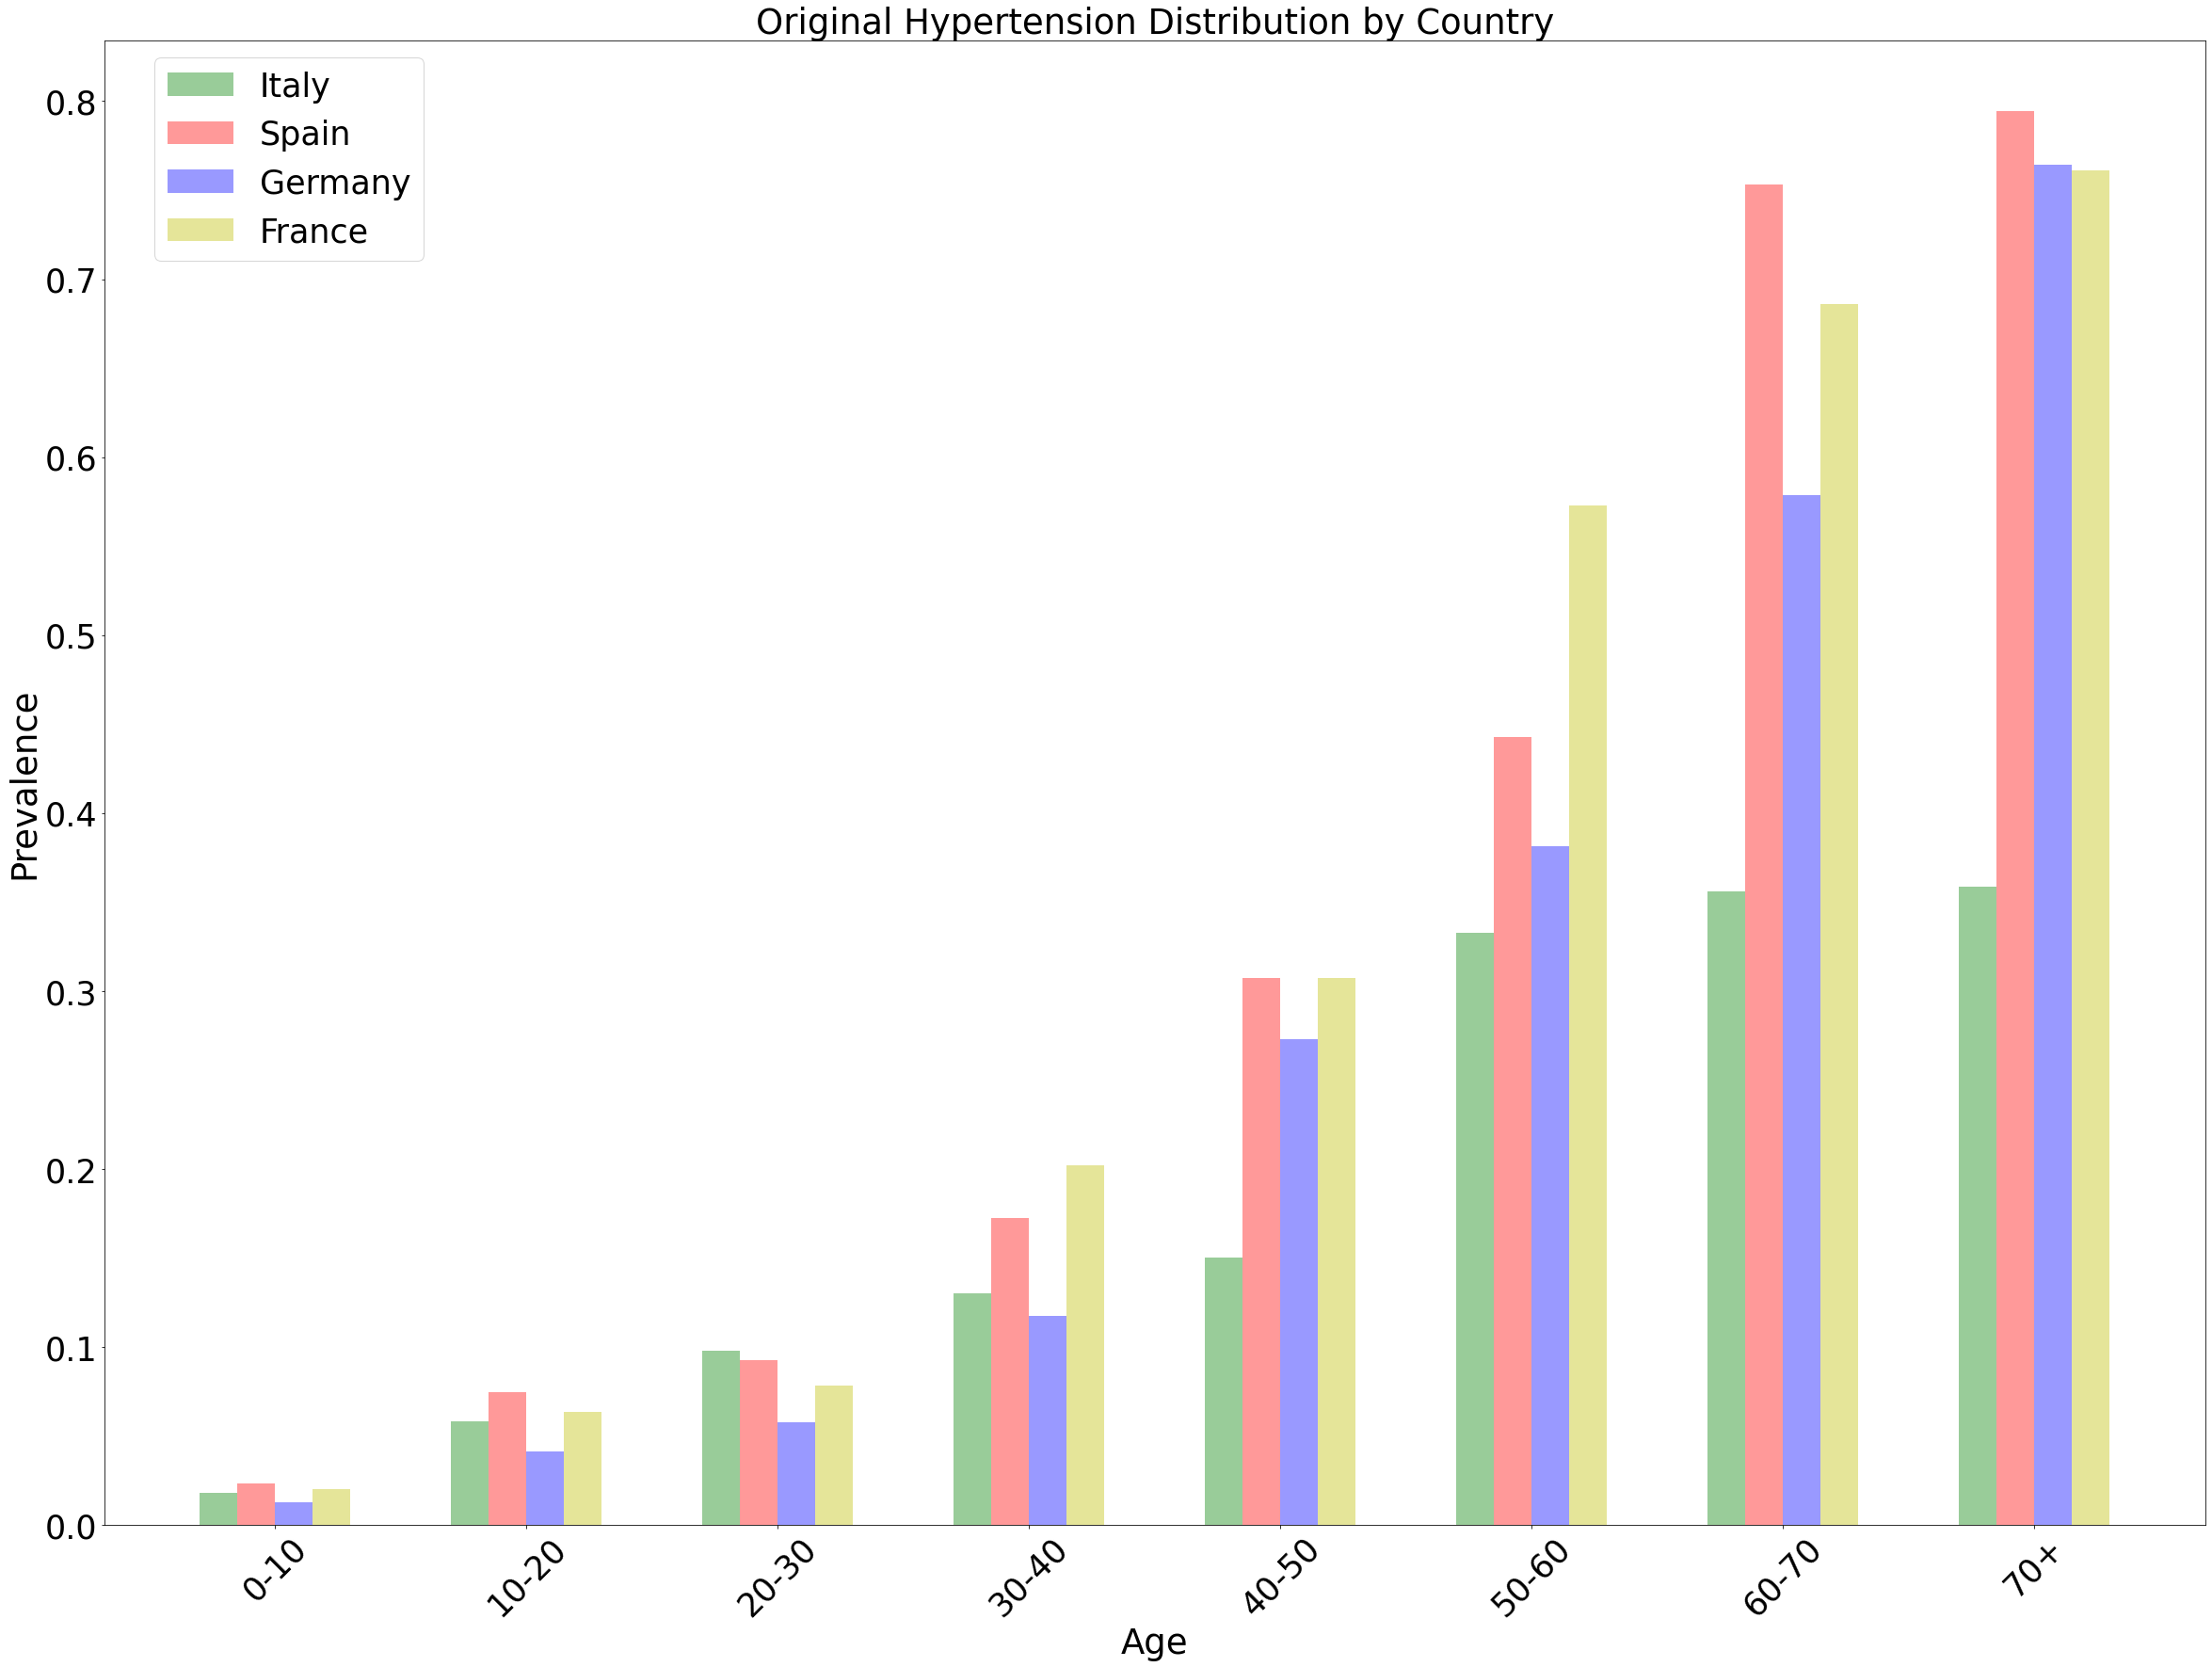

In [19]:
save_plot = True
#save_plot = False 
labels = hyp_df['Age Interval'][:8]# labels for the barplot
labels[7] = '70+'

x = np.arange(len(labels))  # the label locations
width = 0.15  # the width of the bars
fig, ax = plt.subplots(figsize=(40,29))
rects1 = ax.bar(x - 3*width/2 ,hyp_df['Ita Orig'][:8].round(4), width, label='Italy',alpha=0.4, color = 'g')
rects2 = ax.bar(x - width/2,hyp_df['Spa Orig'][:8].round(4), width, label='Spain',alpha = 0.4, color = 'r')
rects3 = ax.bar(x + width/2,hyp_df['Ger Orig'][:8].round(4), width,label='Germany',alpha = 0.4, color = 'b')
rects4 = ax.bar(x + 3*width/2,hyp_df['Fra Orig'][:8].round(4), width, label='France',alpha = 0.4, color = 'y')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Prevalence',fontsize=37)
ax.set_xlabel('Age',fontsize=37)
ax.set_title('Original Hypertension Distribution by Country',fontsize=37)
ax.set_xticks(x)
ax.set_xticklabels(labels,fontsize=35,rotation=45)
#ax.legend(fontsize=10)
ax.legend(loc='best', bbox_to_anchor=(0.16, 1),fontsize=35);

#ax.bar_label(rects1, padding=3,fontsize=8)
#ax.bar_label(rects2, padding=3,fontsize=8)
#ax.bar_label(rects3, padding=3,fontsize=8)
#ax.bar_label(rects4, padding=3,fontsize=8)
#fig.tight_layout()

if save_plot == True:
    plt.yticks(fontsize=35)
    plt.savefig(os.path.join(target_dir,'HypDistr_Comparison.jpg'))
    plt.show()
else:
    plt.show()

#### 3.4  Compare Diabetes Distributions
<a id="compare_diab"></a>

In [ ]:
save_plot = True
#save_plot = False
labels = diab_df['Age Interval'] # labels for the barplot

x = np.arange(len(labels))  # the label locations
width = 0.15  # the width of the bars
fig, ax = plt.subplots(figsize=(40,29))
rects1 = ax.bar(x - 3*width/2 ,diab_df['Ita Orig'].round(4), width, label='Italy',alpha=0.4, color = 'g')
rects2 = ax.bar(x - width/2,diab_df['Spa Orig'].round(4), width, label='Spain',alpha = 0.4, color = 'r')
rects3 = ax.bar(x + width/2,diab_df['Ger Orig'].round(4), width,label='Germany',alpha = 0.4, color = 'b')
rects4 = ax.bar(x + 3*width/2,diab_df['Fra Orig'].round(4), width, label='France',alpha = 0.4, color = 'y')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Prevalence',fontsize=37)
ax.set_xlabel('Diabetes',fontsize=37)
ax.set_title('Original Diabetes Distribution by Country',fontsize=37)
ax.set_xticks(x)
ax.set_xticklabels(labels,fontsize=35, rotation = 45)
#ax.legend(fontsize=10)
ax.legend(loc='best', bbox_to_anchor=(0.16, 1),fontsize=35);

#ax.bar_label(rects1, padding=3,fontsize=8)
#ax.bar_label(rects2, padding=3,fontsize=8)
#ax.bar_label(rects3, padding=3,fontsize=8)
#ax.bar_label(rects4, padding=3,fontsize=8)
#fig.tight_layout()

if save_plot == True:
    plt.yticks(fontsize=35)
    plt.savefig(os.path.join(target_dir,'DiabDistr_Comparison.jpg'))
    plt.show()
else:
    plt.show()